# **Perkenalan**

'''
=================================================
Graded Challenge 6

Nama  : Desvin Sitohang
Batch : MSIB-06 (HCK-014)

Ini adalah program untuk melakukan segmenitasi kostumer berdasarkan data informasi penggunaan kartu kredit mereka.
=================================================
'''

## **Latar Belakang**

Segmentasi kostumer dibutuhkan agar pihak bank dapat mengetahui dan mengelompokan pengguna kartu kredit mereka agar dapat memahami kebutuhan dan perilaku mereka dengan lebih baik. Dengan segmentasi pelanggan, bank dapat menyesuaikan strategi pemasaran, menawarkan produk yang sesuai, dan meningkatkan kepuasan pelanggan. Untuk melaksanakan proses segmentasi tersebut, kami akan menerapkan algoritma clustering k-means dengan tujuan untuk mengelompokkan pengguna kartu kredit berdasarkan kemiripan karakteristik mereka. Ini akan memungkinkan kami untuk mengidentifikasi pola-pola yang ada di antara pengguna kartu kredit dan mengelompokkan mereka ke dalam segmen-segmen yang memiliki kesamaan tertentu. 

## **Tujuan yang hendak dicapai**

Berhasilnya di buat program segmentasi kostumer ini dapat dilihat berdasarkan:

1. Akurasi Segmentasi: Seberapa baik program segmentasi dapat mengelompokkan pelanggan ke dalam segmen yang sesuai dengan karakteristik dan perilaku mereka. Akurasi ini dapat diukur menggunakan nilai , yang mengukur seberapa serupa pelanggan dalam satu segmen dan seberapa berbeda mereka dari segmen lainnya.
2. Peningkatan Penjualan dan Pendapatan: Program segmentasi yang efektif akan membantu bank dalam meningkatkan penjualan produk dan layanan, serta pendapatan keseluruhan. Ini bisa tercermin dalam peningkatan dalam volume transaksi, penggunaan kartu kredit, atau nilai rata-rata transaksi.
3. Efisiensi Pemasaran: Program segmentasi yang baik juga harus membantu bank dalam meningkatkan efisiensi strategi pemasaran mereka. Ini dapat tercermin dalam penurunan biaya pemasaran per pelanggan atau peningkatan dalam tingkat respons terhadap kampanye pemasaran.

## **Pengguna Model**

Model segmentasi ini hendaknya dapat digunakan oleh:

1. Marketing Division : Untuk melakukan pemasaran agar dapat meningkatkan penjualan produk atau layanan yang ada.
2. QC Division : Untuk melakukan pemantauan situasi pengguna kartu kredit persegmentasi. Jika ada suatu hal yang diluar batas aman, dapat langsung menghubungi pihak terkait (misal target pengguna dengan segmentasi high spender berkurang dari waktu yang lalu maka bisa mengubungi marketing division) 

#  **Query SQL**

#Memanggil database dan mendeskripsikannya menjadi dataframe
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_msib_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;

### Data selesai diambil dari big query, selanjutnya kita akan import menjadi .csv langsung di big querry

# **Import Libraries**

In [268]:
#Menganalisis data
import pandas as pd

#Melakukan pengolahan angka
import numpy as np

#Membuat visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify

#Feature Selection
from scipy.stats import pearsonr

#preposesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler

#Penanganan Outlier
!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

#pemodelan ml
from sklearn.cluster import KMeans

# Function to create Silhouette Plot
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

#save model
import pickle
import joblib
import json

# **Data Loading**

#### Pertama kita akan load data dari data yang sudah di import dari big query tadi

In [269]:
data_kredit = pd.read_csv('P1G6_Set_1_Desvin_Sitohang.csv')

Untuk menjaga keaslian data, maka akan dibuat dataset salinan untuk mencegah hal yang tidak diinginkan

In [270]:
df = data_kredit

#### Kemudian kita akan melihat nilai awal dan nilai akhir dari data

In [271]:
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [272]:
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

#### Pada dataset diketahui bahwa:
- Memiliki 18 kolom
- Memiliki 4.475 baris
- Kolom CUST_ID merupakan kolom penanda untuk dataset ini
- Semua kolom pada dataset bertipe numerik namun memiliki rentang nilai yang jauh
- Nampak ada beberapa data yang memiliki rentang nilai dari 0 - 1
- Nampak semua tipe data kolom sudah sesuai dengan nilainya masing-masing

## **Kardinalitas**

Karena semua kolom pada data bertipe numerik dan ada 1 kolom yang merupakan kolom tanda yaitu CAST_ID sehingga tidak kardinalitas dari data tidak dilihat

## **Duplicated Data**

Kemudian akan dilihat apakah pada dataset ada data yang berulang atau tidak

In [274]:
df.duplicated().sum()

0

Setelah dilakukan analisa, didapat bahwa data tidak memiliki duplikasi pada peubah acak nya

# **EDA**

### Diketahui bahwa data merupakan nilai dari kartu kredit yang berisikan :
- Informasi keuangan pada kartu kredit (rekening)
- Informasi cash flow pada kartu kredit (rekening)
- Rekapitulasi dari hasil transaksi yang dilakukan pengguna

Dari hasil analisis secara sekilasi ini, kemudian kita akan bedah karakteristik nya

#### Pertama kita akan melihat ringkasan nilai statistika deskriptif dari datanya

In [275]:
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4476.000000   1565.743939           0.877608   1003.158324   
std    2583.931114   2091.205727           0.235604   2210.812899   
min       2.000000      0.000000           0.000000      0.000000   
25%    2239.000000    132.536353           0.888889     40.065000   
50%    4476.000000    874.905296           1.000000    362.480000   
75%    6713.000000   2058.519163           1.000000   1122.640000   
max    8950.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         588.504849              415.025075    973.453671   
std         1666.500287              927.360842   2133.464502   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           29.990000               89.450000      0.000000   
75%          580.320000              484.255000   1098.569962   
max        40761.250000            22500.000000  29282.109150   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490122                    0.202614   
std               0.399874                    0.298502   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.364989                0.134156   
std                            0.397336                0.199221   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.181818   
max                            1.000000                1.166667   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4474.000000   4475.000000   
mean           3.196425      14.490503   4494.020175   1726.212274   
std            6.500169      24.156038   3668.535689   2961.258570   
min            0.000000       0.000000    150.000000      0.000000   
25%            0.000000       1.000000   1500.000000    390.206371   
50%            0.000000       7.000000   3000.000000    831.048408   
75%            4.000000      17.000000   6000.000000   1895.959003   
max          110.000000     358.000000  30000.000000  46930.598240   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4317.000000       4475.000000  4475.000000  
mean         854.429538          0.157206    11.516425  
std         2306.411178          0.295869     1.347819  
min            0.037744          0.000000     6.000000  
25%          169.814310          0.000000    12.000000  
50%          309.854995          0.000000    12.000000  
75%          830.395060          0.166667    12.000000  
max        61031.618600          1.000000    12.000000

#### Dari hasil analisis statistik deskriptif dari data, deketahui bahwa:
- Sebagian besar dari kolom pada data memiliki nilai rata-rata dan median yang cukup jauh berbeda sehingga diasumsikan bahwa sebagian besar kolom pada data berdistribusi skew
- diketahui bahwa nilai standar deviasi pada setiap kolom memiliki nilai yang sangat tinggi baik pada kolom dengan rentang nilai 0 - 1 maupun data dengan rentang tak terbatas
- diketahui juga bahwa kisaran atau rentang nilai dari data memiliki nilai jang jauh berbeda sehingga perlu discalling pada feature engineering nanti

##### Identifikasi Pola Pembelian:  diharapkan bahwa dapat mengidentifikasi pola pembelian yang mungkin ada di antara pengguna kartu kredit, seperti pembelian sekaligus (one-off purchases) vs pembelian angsuran (installments purchases).

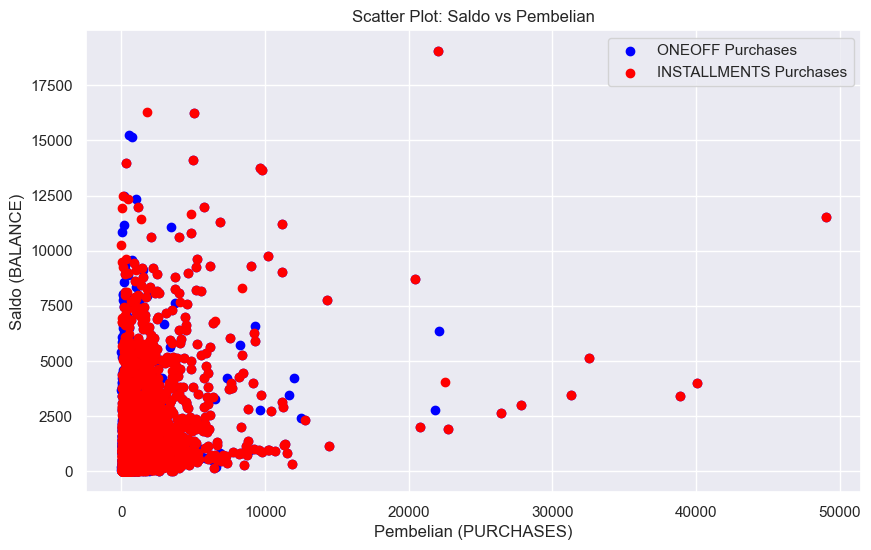

In [276]:

# Memisahkan pembelian sekaligus dan pembelian angsuran
oneoff_purchases = df[df['ONEOFF_PURCHASES'] > 0]
installments_purchases = df[df['INSTALLMENTS_PURCHASES'] > 0]

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(oneoff_purchases['PURCHASES'], oneoff_purchases['BALANCE'], color='blue', label='Pembelian Sekaligus')
plt.scatter(installments_purchases['PURCHASES'], installments_purchases['BALANCE'], color='red', label='Pembelian Angsuran')

# Menambahkan label sumbu dan judul
plt.xlabel('Pembelian (PURCHASES)')
plt.ylabel('Saldo (BALANCE)')
plt.title('Scatter Plot: Saldo vs Pembelian')
plt.legend(labels=['ONEOFF Purchases', 'INSTALLMENTS Purchases'])

Berdasarkan hasil visualisasi antara pembeli kontan dan pembelian angsuran, dapat diketahui beberapa hal ini:

1. Terdapat konsentrasi pembelian di titik bawah kiri (pembelian rendah dan balance rendah)
2. Semakin tinggi balance, semakin bervariasi jumlah pembeliannya (terlihat dari persebaran titik yang lebih lebar di bagian atas).
3. Pembelian sekaligus umumnya bernilai rendah (terlihat dari konsentrasi titik di bagian kiri bawah).
4. Pembelian angsuran umumnya bernilai tinggi (terlihat dari banyaknya titik di bagian kanan atas).

Namun dari plot ini juga Tidak terlihat tren yang jelas serta Ada kemungkinan pola pembelian berbeda-beda tergantung pada jenis produk, demografi konsumen, dan faktor lainnya. Tetapi pada Scatter plot ini menunjukkan bahwa mayoritas pembelian adalah pembelian angsuran dengan nilai yang relatif rendah namum sangat bervariasi saat balance nya semakin tinggi.

#### Kemudian kita akan melakukan checking balance frequncy update untuk mengetahui seberapa sering pengguna menggunakan kartu kredit mereka (1 = sering dan 0 = jarang)

C:\Users\62822\AppData\Local\Temp\ipykernel_6532\1263080977.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BALANCE_FREQUENCY'], ax=axes)


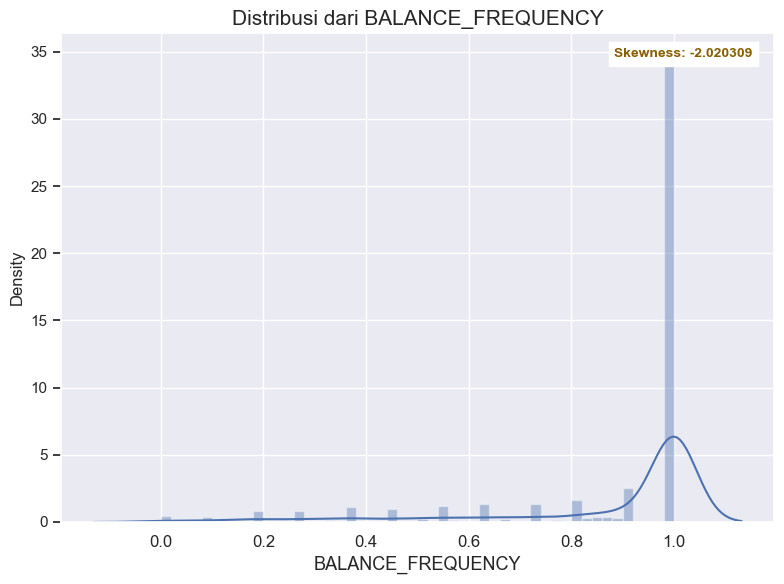

In [277]:
fig, axes = plt.subplots(figsize=(8, 6)) #Membuat plot awal

# Plot distribusi dari kolom "BALANCE_FREQUENCY"
sns.distplot(df['BALANCE_FREQUENCY'], ax=axes)

axes.set_title('Distribusi dari BALANCE_FREQUENCY', fontsize=15, loc='center')
axes.set_xlabel('BALANCE_FREQUENCY', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
axes.yaxis.tick_left()  # where the y axis marks will be

# Tambahkan teks untuk skewness dan kurtosis
axes.text(x=0.97, y=0.97, transform=axes.transAxes,
            s="Skewness: %f" % df['BALANCE_FREQUENCY'].skew(), fontweight='demibold', fontsize=10,
            verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()

Dapat dilihat bahwa pada plot, nilai 1 sangat tinggi dibanding nilai yang lainnya, artinya sebagian besar pengguna sering melakukan update pada balance kartu kredit mereka masing-masing

#### Selanjutnya akan dilihat bagaimana perbandingan sebaran data PURCHASES dan PAYMENT mengetahui adakah pengaruh PEMBELIAN terhadap PEMBAYARAN. Jika asumsi benar, maka sebaran data PAYMENT akan bergeser ke kanan (nilai yang lebih besar) dibandingkan dengan sebaran data PURCHASES.

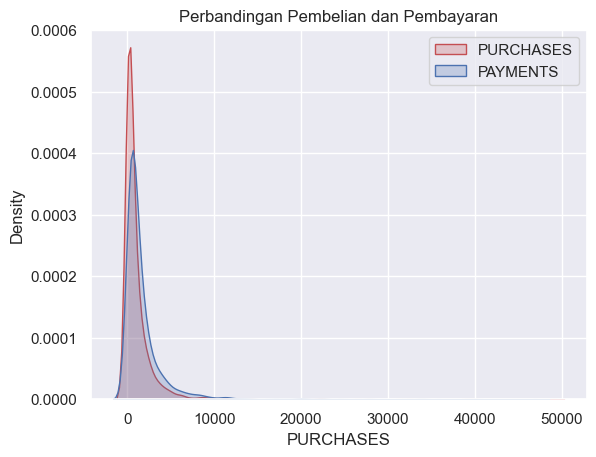

In [278]:
sns.set_theme(style="darkgrid")
sns.kdeplot(df['PURCHASES'], fill=True, color="r")
sns.kdeplot(df['PAYMENTS'], fill=True, color="b")
plt.legend(labels=['PURCHASES', 'PAYMENTS'])
plt.title('Perbandingan Pembelian dan Pembayaran')
plt.show()

Dari plot diketahui bahwa:
- Terdapat korelasi positif antara pembelian (PURCHASES) dan pembayaran (PAYMENTS). Hal ini terlihat dari kemiringan positif pada garis tren. Semakin banyak pembelian yang dilakukan, semakin banyak pula pembayaran yang harus dilakukan.
- Terdapat konsentrasi pembelian di titik bawah kiri (pembelian rendah dan pembayaran rendah). Semakin tinggi nilai pembelian, semakin bervariasi nilai pembayarannya (terlihat dari persebaran titik yang lebih lebar di bagian atas).
- Terdapat konsentrasi pembayaran di kuadran bawah kiri (pembelian rendah dan pembayaran rendah). Semakin tinggi nilai pembelian, semakin tinggi pula nilai pembayarannya (terlihat dari persebaran titik yang lebih terkonsentrasi di sepanjang garis tren).

Plot menunjukkan bahwa pembelian memiliki pengaruh positif terhadap pembayaran. Semakin banyak pembelian yang dilakukan, semakin banyak pula pembayaran yang harus dilakukan.

#### Setelah mengetahui bahwa pembayaran yang dilakukan pengguna tegak lurus dengan pembelian yang dilakukan, maka akan dilihat prilaku pembayaran yang dilakukan oleh pengguna

In [279]:
# Memisahkan pembelian sekaligus dan pembelian angsuran
high_payout = df[df['PRC_FULL_PAYMENT'] >= 0.6666666]
medium_payout = df[(df['PRC_FULL_PAYMENT'] >= 0.3333333) & (df['PRC_FULL_PAYMENT'] < 0.6666666)]
low_payout = df[(df['PRC_FULL_PAYMENT'] >= 0) & (df['PRC_FULL_PAYMENT'] < 0.3333333)]

#membuat dataframe payout_user untuk memudahkan dalam melakukan analisis
payout_user = pd.DataFrame({
    'high_payout': high_payout['PRC_FULL_PAYMENT'],
    'medium_payout': medium_payout['PRC_FULL_PAYMENT'],
    'low_payout': low_payout['PRC_FULL_PAYMENT']
})

payout_user.describe()

high_payout  medium_payout   low_payout
count   496.000000     252.000000  3727.000000
mean      0.903956       0.496088     0.034912
std       0.116635       0.077325     0.077095
min       0.666667       0.363636     0.000000
25%       0.800000       0.425595     0.000000
50%       1.000000       0.500000     0.000000
75%       1.000000       0.555556     0.000000
max       1.000000       0.636364     0.333333

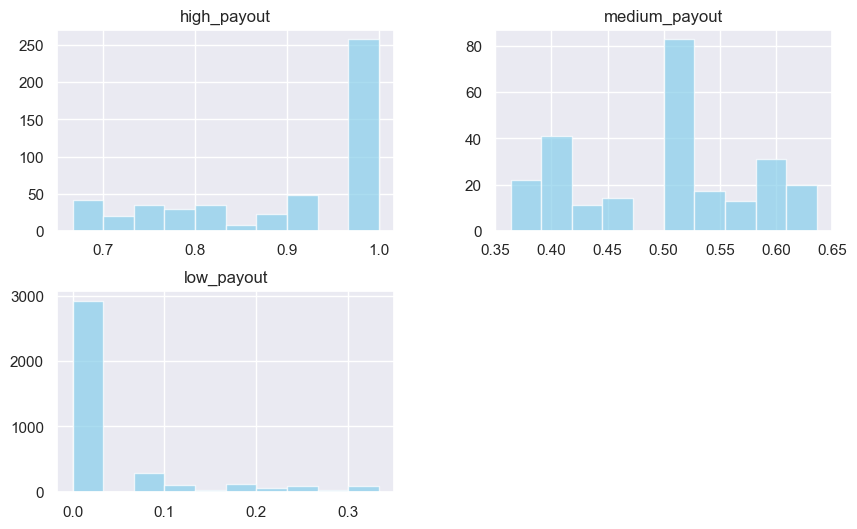

In [280]:
# Membuat histogram menggunakan Pandas
payout_user.hist(figsize=(10, 6), bins=10, color='skyblue', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('PRC_FULL_PAYMENTS')
plt.ylabel('Frequency')
plt.title('Histogram of Payout Segments')

# Menampilkan histogram
plt.show()


Dari hasil analisis staitik deskirptif mengenai prilaku pembayaran dapat diketahui :
- Segmen pembayaran rendah memiliki jumlah pengguna yang jauh lebih besar daripada segmen pembayaran tinggi dan sedang. Ini menunjukkan bahwa sebagian besar pengguna kartu kredit cenderung jarang melakukan pembayaran penuh secara konsisten. Dari histogram juga dapat dilihat bahwa orang yang tidak melakukan pembayran (PRC_PAYMENT = 0) itu sangat tinggi sekali.
- Dari persentil ke-25 hingga ke-75, nilai PRC_FULL_PAYMENTS cenderung meningkat dari segmen pembayaran rendah ke tinggi. Hal ini menunjukkan bahwa semakin tinggi segmen pembayaran, semakin besar kemungkinan pengguna melakukan pembayaran penuh.
- Pengguna dalam segmen pembayaran tinggi memiliki kecenderungan untuk melakukan pembayaran penuh secara konsisten, dengan rata-rata pembayaran penuh sebesar 0.904 dan nilai minimum sebesar 0.667
- Standar deviasi yang lebih tinggi dalam segmen pembayaran tinggi menunjukkan variasi yang lebih besar dalam perilaku pembayaran dibandingkan dengan segmen pembayaran Sedang dan rendah.

Sehingga dapat disimpulkan bahwa sebagian besar pengguna kartu kredit melakukan pembayaran dibawah 33.33% dari pembelian mereka. sedangkan pada segmen high payout, rata-rata dari segmen tersebut akan melakukan pembayaran secara penuh. Namun dari hasil analisis ini diketahui bahwa prilaku pembayaran pengguna adalah *Tidak bayar sama sekali* atau *membayar secara full* dan untuk itu maka akan dilakukan pengelompokan serta analisis kembali

In [281]:
# Memisahkan pembelian sekaligus dan pembelian angsuran
full_payout = df[df['PRC_FULL_PAYMENT'] == 1]
in_range_payout = df[(df['PRC_FULL_PAYMENT'] >= 0.00000000001) & (df['PRC_FULL_PAYMENT'] < 0.99999999999)]
zero_payout = df[(df['PRC_FULL_PAYMENT'] == 0 )]

#membuat dataframe payout_user untuk memudahkan dalam melakukan analisis
payout_user = pd.DataFrame({
    'Full_payout': full_payout['PRC_FULL_PAYMENT'],
    'in_range_payout': in_range_payout['PRC_FULL_PAYMENT'],
    'Zero_payout': zero_payout['PRC_FULL_PAYMENT']
})

payout_user.describe()

Full_payout  in_range_payout  Zero_payout
count        258.0      1291.000000       2926.0
mean           1.0         0.345077          0.0
std            0.0         0.264884          0.0
min            1.0         0.083333          0.0
25%            1.0         0.100000          0.0
50%            1.0         0.250000          0.0
75%            1.0         0.500000          0.0
max            1.0         0.916667          0.0

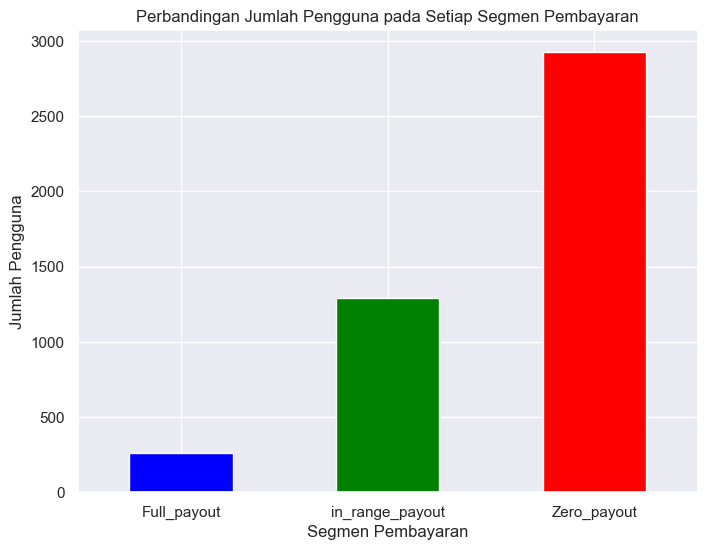

In [282]:
# Menghitung jumlah pengguna dalam setiap segmen
segment_counts = payout_user.count()

# Membuat bar plot
plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color=['blue', 'green', 'red'])

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Jumlah Pengguna pada Setiap Segmen Pembayaran')
plt.xlabel('Segmen Pembayaran')
plt.ylabel('Jumlah Pengguna')

# Menampilkan plot
plt.xticks(rotation=0)
plt.show()

Dari hasil analisis berdasarkan pengelompkan orang yang melakukan pembayaran secara full, in range (mencicil), dan tidak membayar sama sekali. terlihat bahwa memang sebagian besar orang yang tidak membayar memiliki nilai yang tinggi, sementara orang yang melakukan pembayaran penuh hanya sebagian kecil saya. tetapi yang cukup berbeda dari segmentasi pembayaran yang pertama adalah orang yang melakukan pembayaran in range (mencicil) itu hampir setengah dari orang yang tidak membayar dan jauh lebih tinggi dari orang yang membayar secara full.

## Dari hasil eksplorasi dan analisi data didaptkan bahwa:
- Pengguna cenderung lebih suka melakukan pembelian secara angsuran (installment) daripada langsung sekaligus (One Off)
- Sebagian besar pengguna cenderung melakukan pembelian yang rendah (hal ini terlihat dari Terdapat konsentrasi pembelian di titik bawah kiri)
- Semakin tinggi pengguna melakukan pembelian, maka pengguna tersebut juga akan semakin tinggi pula melakukan pembayaran
- Pengguna yang tidak melakukan pembayaran sama sekali jauh lebih besar dari pada pengguna yang melakukan pembayaran secara full maupun secara angsuran

# **Feature Engineering**

Karena KMeans hanya dapat melakukan pengelompokan pada fitur numerik, kolom `CUST_ID` akan dihapus untuk sementara. Setelah proses pengelompokan selesai, kolom ini akan digunakan kembali.

In [283]:
df = df.drop('CUST_ID', axis=1)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039

## **Handling Outlier**

### Selanjutnya akan dilihat jumlah outlier pada setiap kolom fitur ini berdasarkan data X_train

In [284]:
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in df.columns:
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(df[i] < lower_bound)
    num_outliers_upper = np.sum(df[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = df.columns
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

Kolom  Jumlah Outlier  Lower Bound  Upper Bound
0                            BALANCE             338 -2756.437862  4947.493378
1                  BALANCE_FREQUENCY             745     0.722223     1.166666
2                          PURCHASES             384 -1583.797500  2746.502500
3                   ONEOFF_PURCHASES             487  -870.480000  1450.800000
4             INSTALLMENTS_PURCHASES             411  -726.382500  1210.637500
5                       CASH_ADVANCE             516 -1647.854943  2746.424905
6                PURCHASES_FREQUENCY               0    -1.166668     2.166668
7         ONEOFF_PURCHASES_FREQUENCY             379    -0.499999     0.833333
8   PURCHASES_INSTALLMENTS_FREQUENCY               0    -1.125000     1.875000
9             CASH_ADVANCE_FREQUENCY             372    -0.272727     0.454545
10                  CASH_ADVANCE_TRX             402    -6.000000    10.000000
11                     PURCHASES_TRX             366   -23.000000    41.000000
12                      CREDIT_LIMIT               0          NaN          NaN
13                          PAYMENTS             395 -1868.422577  4154.587951
14                  MINIMUM_PAYMENTS               0          NaN          NaN
15                  PRC_FULL_PAYMENT             685    -0.250001     0.416668
16                            TENURE             668    12.000000    12.000000

Dari hasil analisis diketahui bahwa hanya 2 kolom yang tidak memiliki outlier pada data sedangkan kolom lainnya mengandung outliers dengan jumlah yang berbeda-beda. Dari hasil analisis juga diketahui bahwa terdapat nilai (NaN) pada kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS`, hal ini diasumsikan karena pada kolom tersebut memiliki missing value sehingga mengacaukan perhitungan nilai Upper & Lower Bound dari data dan juga jumlah outliernya sendiri **sehingga akan dilakukan outlier handling kembali sesudah dilakukan handling missing value**. Karena algoritma yang akan digunakan kali ini sangat sensitif terhadap outlier(K-MEANS) sehingga outlier yang ada pada data selanjutnya akan di handling semua menggunakan metode Capping karena jumlah outlier pada data cukup banyak, jika dilakukan Trimming maka akan membuang banyak sekali data.

In [285]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df.columns:
    skewness = df[i].skew()
    if -0.5 <= skewness <= 1:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
kolom yang mempunyai nilai skewness normal: ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']


Setelah dilihat sebaran datanya, diketahui bahwa seluruh kolom yang mengandung outlier berdistribusi skew, sehingga akan dilakukan capping dengan metode iqr. Namum untuk kolom TENURE akan dilakukan Trimming karena mempunyai nilai variasi yang sangat kecil.

In [286]:
# Daftar nilai yang ingin dihapus
excluded_values = ['TENURE']
# Membuat list yang berisi nilai yang tidak termasuk dalam excluded_values
outliers_skew = [value for value in df if value not in excluded_values]


In [287]:
#Penanganan outlier menggunakan metode capping dengan Winsorizer untuk kolom skew
winsoriserskew = Winsorizer(capping_method='iqr', #For skewed distribution
                            tail='both',
                            fold=0.5,
                            variables= outliers_skew,      #Target columns
                            missing_values='ignore')

df_capped = winsoriserskew.fit_transform(df)

df_capped



BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.833334     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.833334      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00            870.48   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3021.510568           1.000000     560.98            427.22   
4473  3021.510568           1.000000    1595.93            870.48   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0000      0.000000             0.125000   
1                     0.0000      0.000000             0.125000   
2                     0.0000      0.000000             0.125000   
3                     0.0000      0.000000             0.125000   
4                     0.0000      0.000000             0.125000   
...                      ...           ...                  ...   
4470                  0.0000   1259.571764             0.000000   
4471                  0.0000   1647.854943             0.000000   
4472                133.7600   1647.854943             1.000000   
4473                  0.0000   1647.854943             0.454545   
4474                726.3825   1647.854943             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.499999                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.272727                 6              0        1200.0   
4471                0.272727                 6              0        4150.0   
4472                0.272727                 6             20        8250.0   
4473                0.272727                 6             25        6000.0   
4474                0.272727                 6             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        271.364415          0.090909      11  
4471  2648.835319        241.645387          0.090909      11  
4472  1039

In [288]:
#Penanganan outlier dengan metode trimming
upper_bound = outliers.loc[outliers['Kolom'] == 'TENURE', 'Upper Bound'].values[0]
lower_bound = outliers.loc[outliers['Kolom'] == 'TENURE', 'Lower Bound'].values[0]

# Flag the outliers in category `TENURE`
outliers_TENURE = np.where((df_capped['TENURE'] > upper_bound) |
                                    (df_capped['TENURE'] < lower_bound), True, False)

# Memasukan hasil trimming ke dataset
df_trimmed = df_capped.loc[~(outliers_TENURE)]
df_trimmed



BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
9        0.004816           0.833334    51.7000              0.00   
10     867.728471           1.000000    41.0700              0.00   
11      41.255670           0.833334   297.4000            297.40   
12     857.767403           1.000000   639.5600              0.00   
13    3021.510568           1.000000   393.8700              0.00   
...           ...                ...        ...               ...   
4443  3021.510568           1.000000  1663.9275            870.48   
4444  3021.510568           1.000000  1464.1400            870.48   
4445  3021.510568           1.000000  1349.6200            870.48   
4446  1871.597836           1.000000  1663.9275            208.49   
4447  1193.644707           1.000000   850.1500            850.15   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
9                    51.7000      0.000000             0.250000   
10                   41.0700      0.000000             0.250000   
11                    0.0000      0.000000             0.250000   
12                  639.5600      0.000000             0.250000   
13                  393.8700      0.000000             0.250000   
...                      ...           ...                  ...   
4443                132.8800   1647.854943             0.833333   
4444                485.4300   1647.854943             0.833333   
4445                461.6800   1647.854943             0.833333   
4446                726.3825   1647.854943             0.833333   
4447                  0.0000   1647.854943             0.416667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
9                       0.000000                          0.250000   
10                      0.000000                          0.250000   
11                      0.250000                          0.000000   
12                      0.000000                          0.250000   
13                      0.000000                          0.250000   
...                          ...                               ...   
4443                    0.499999                          0.166667   
4444                    0.499999                          0.666667   
4445                    0.499999                          0.833333   
4446                    0.166667                          0.750000   
4447                    0.416667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
9                   0.000000                 0              3        3000.0   
10                  0.000000                 0              3        3000.0   
11                  0.000000                 0              5        6000.0   
12                  0.000000                 0              4        2200.0   
13                  0.000000                 0              8        6000.0   
...                      ...               ...            ...           ...   
4443                0.272727                 6             25        8250.0   
4444                0.272727                 6             23        8250.0   
4445                0.272727                 6             21        6000.0   
4446                0.272727                 6             25        5500.0   
4447                0.272727                 6              8        2500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
9       33.249088          0.059481          0.000000      12  
10    1409.282903        233.788637          0.000000      12  
11     595.460601        173.255085          0.250001      12  
12     210.272469        254.976679          0.000000      12  
13    1536.774213       1160.685435          0.000000      12  
...           ...               ...               ...     ...  
4443  2648.835319       1160.685435          0.090909      12  
4444  1658.563509       1160.685435          0.000000      12  
4445  2212

### Setelah selesai dihandling, kemudian akan dilihat sebaran sesudah dan sebelum dihandling menggunakan histogram dan boxplot untuk setiap kolom fitur

In [289]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='teal')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='teal')
    plt.title('Boxplot')

    plt.show()

BALANCE - Before Capping


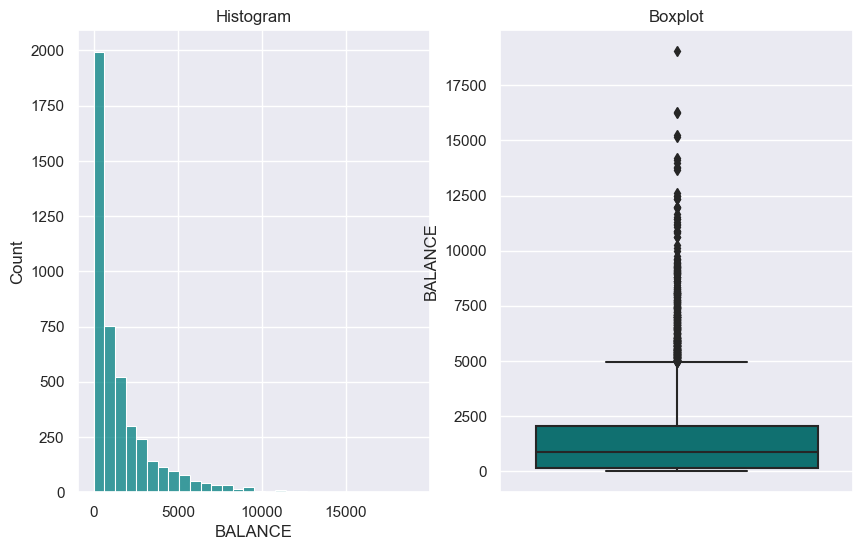


BALANCE - After Capping


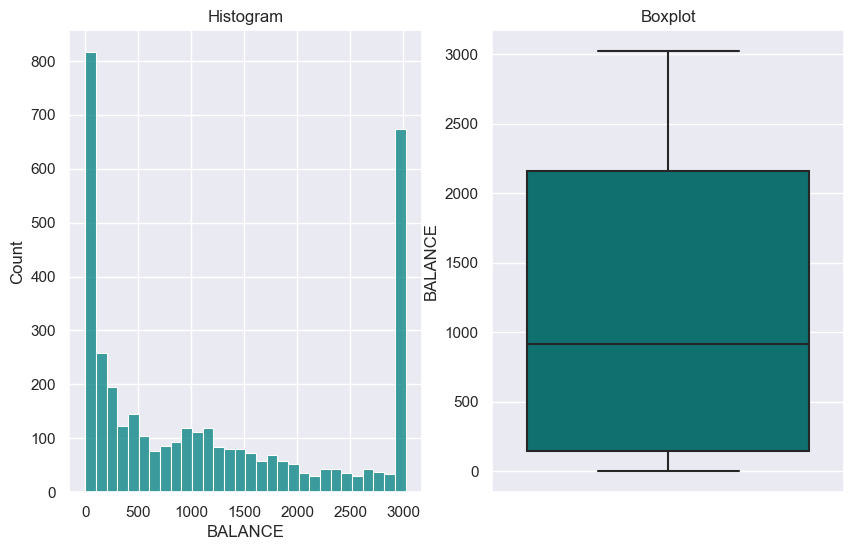

BALANCE_FREQUENCY - Before Capping


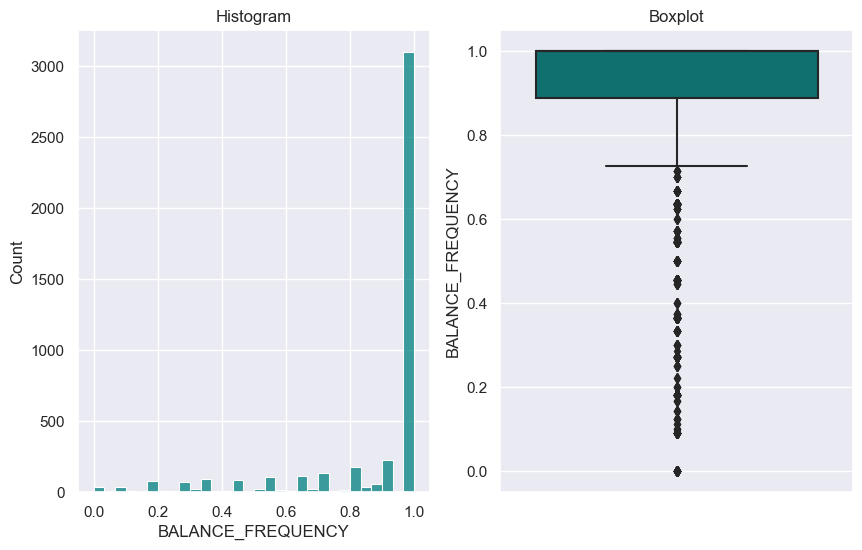


BALANCE_FREQUENCY - After Capping


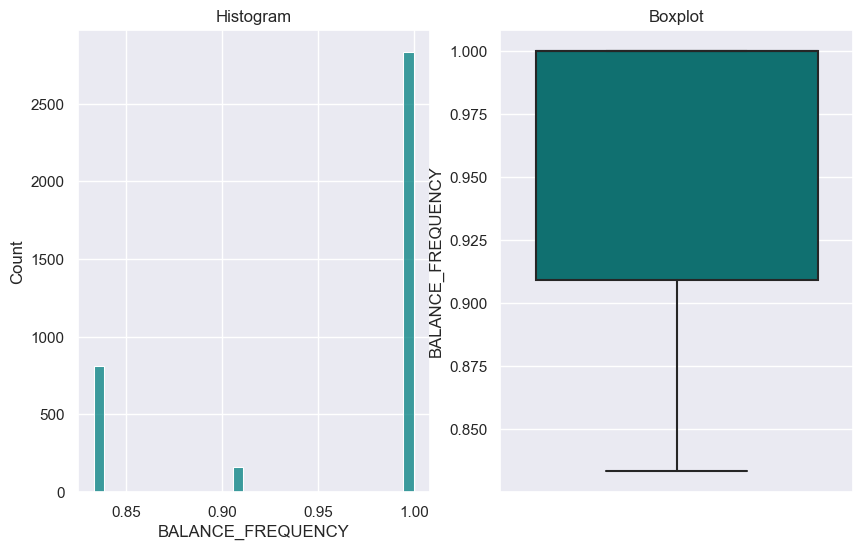

PURCHASES - Before Capping


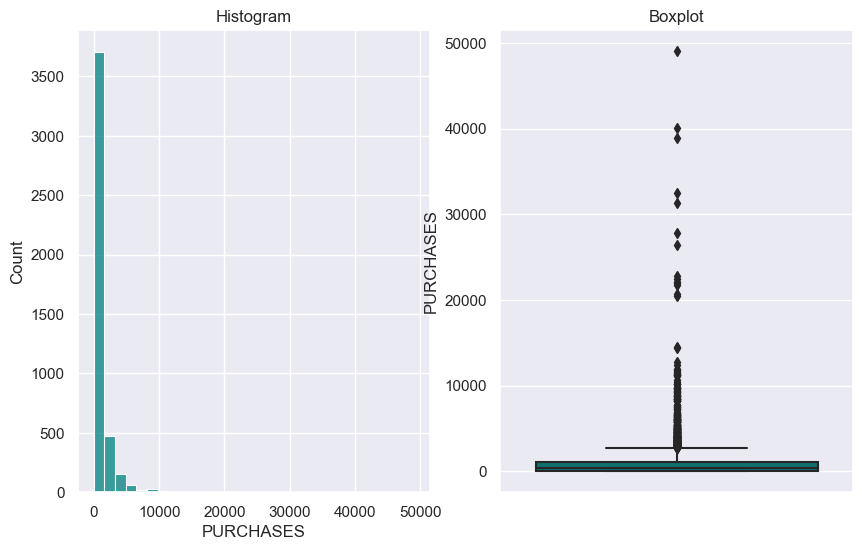


PURCHASES - After Capping


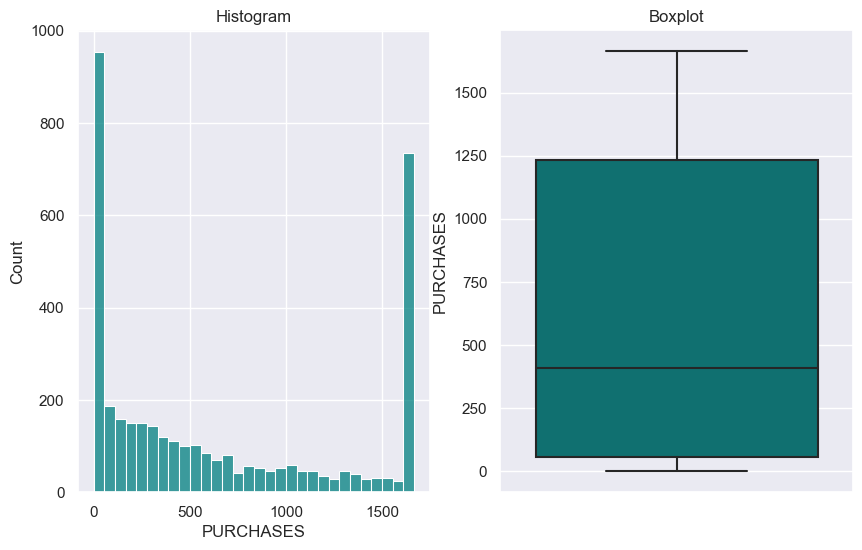

ONEOFF_PURCHASES - Before Capping


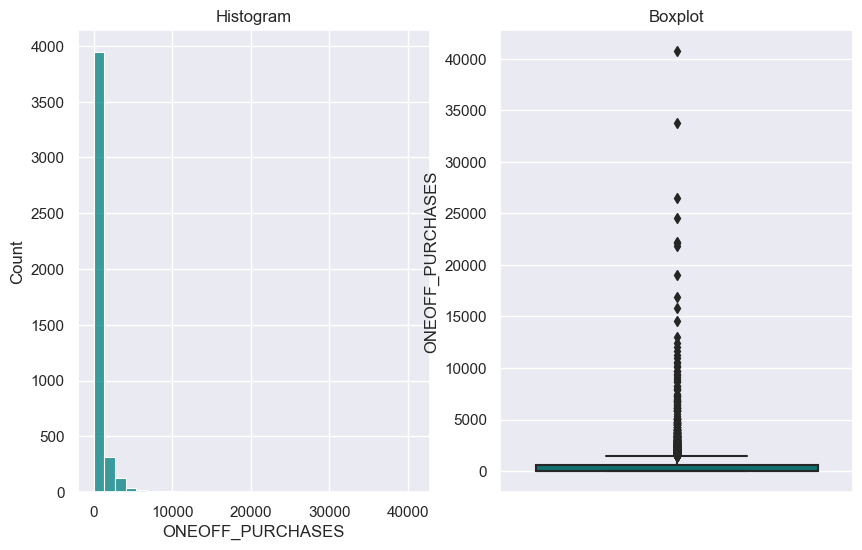


ONEOFF_PURCHASES - After Capping


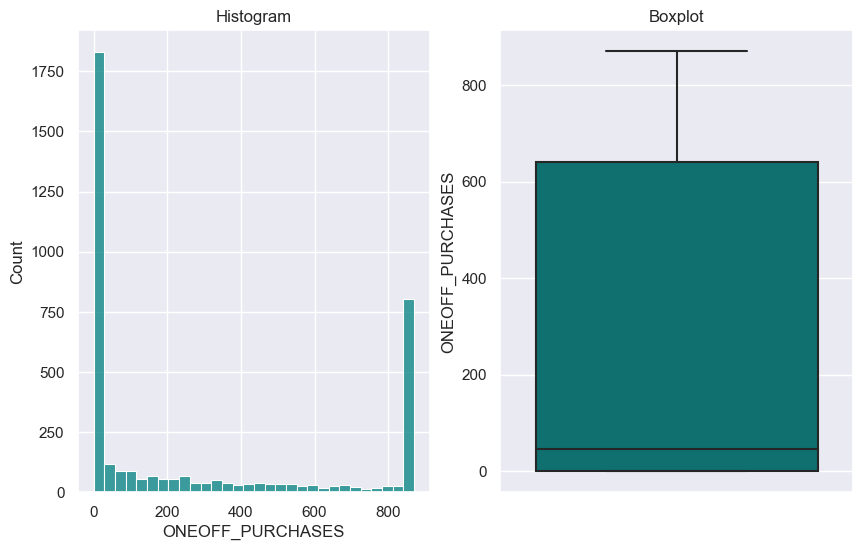

INSTALLMENTS_PURCHASES - Before Capping


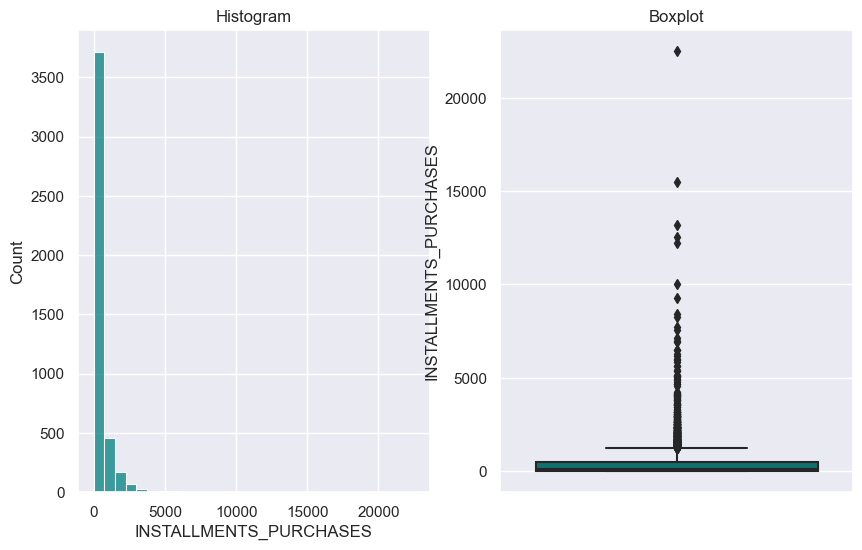


INSTALLMENTS_PURCHASES - After Capping


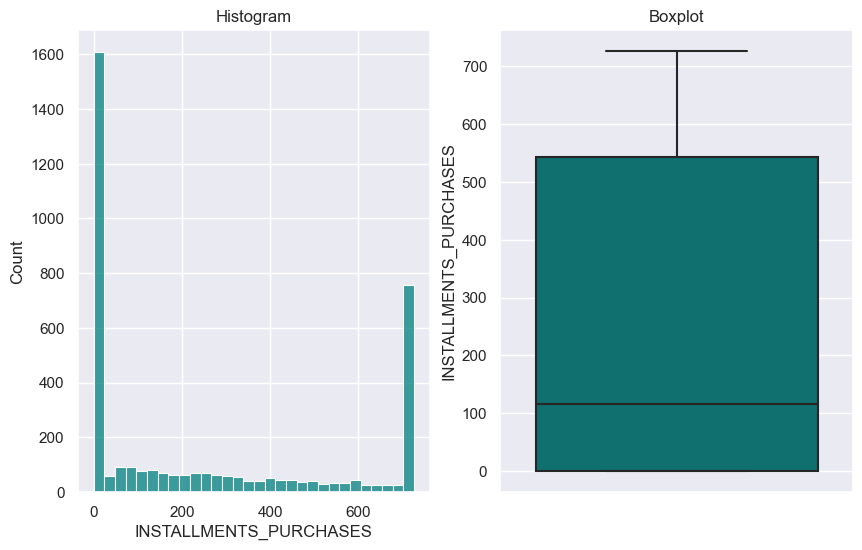

CASH_ADVANCE - Before Capping


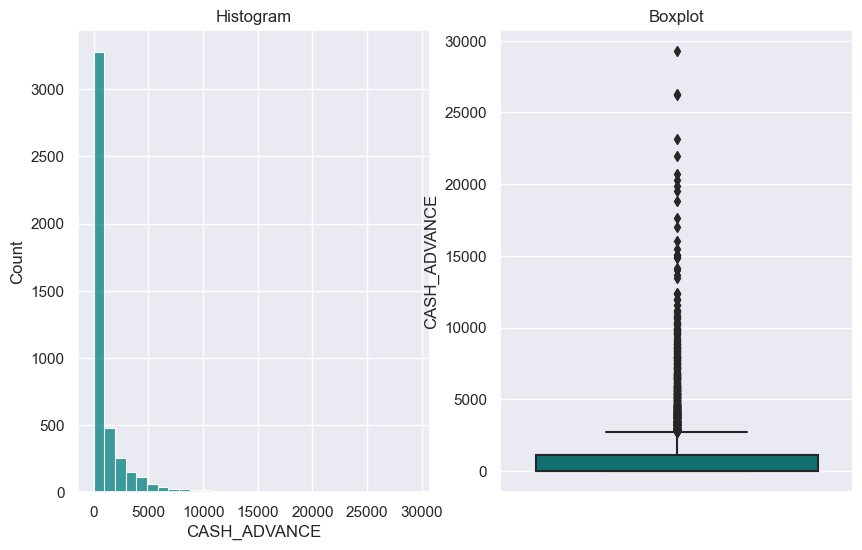


CASH_ADVANCE - After Capping


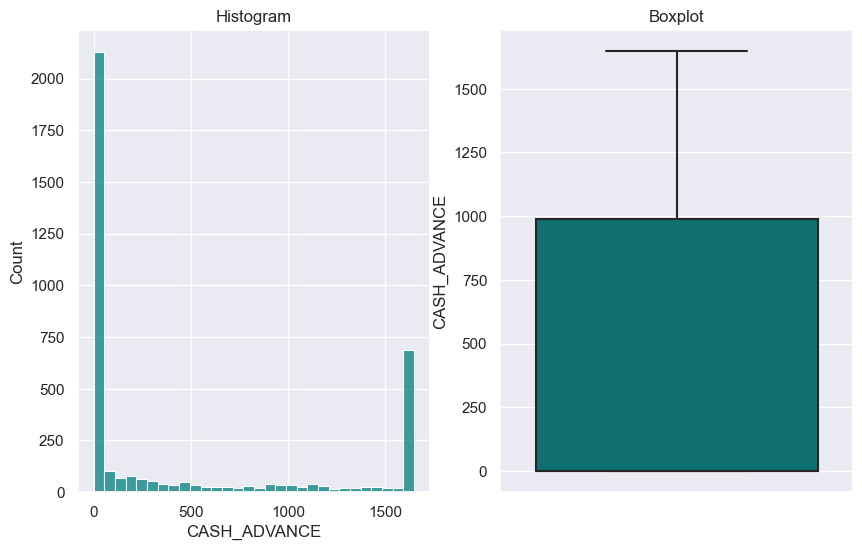

PURCHASES_FREQUENCY - Before Capping


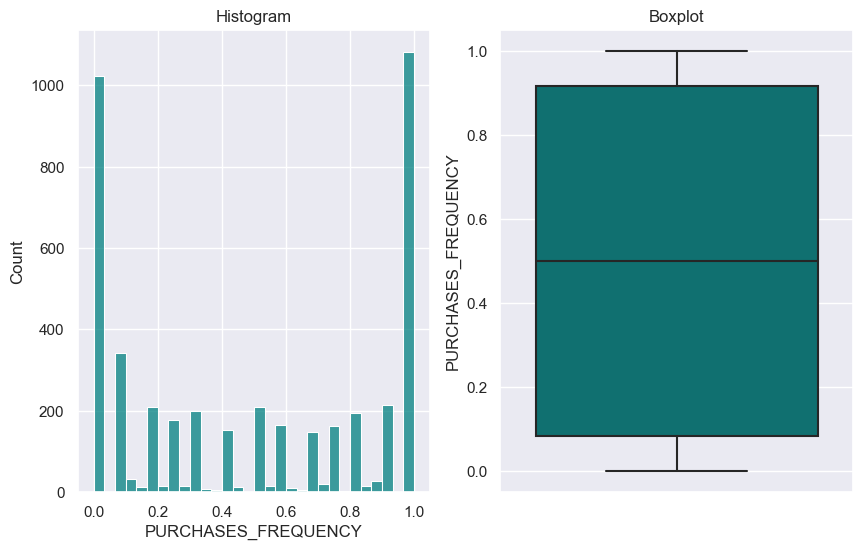


PURCHASES_FREQUENCY - After Capping


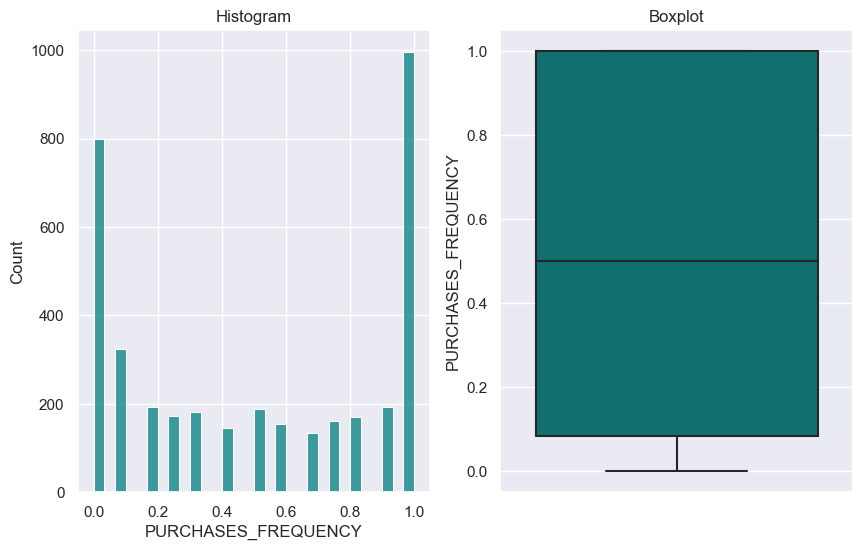

ONEOFF_PURCHASES_FREQUENCY - Before Capping


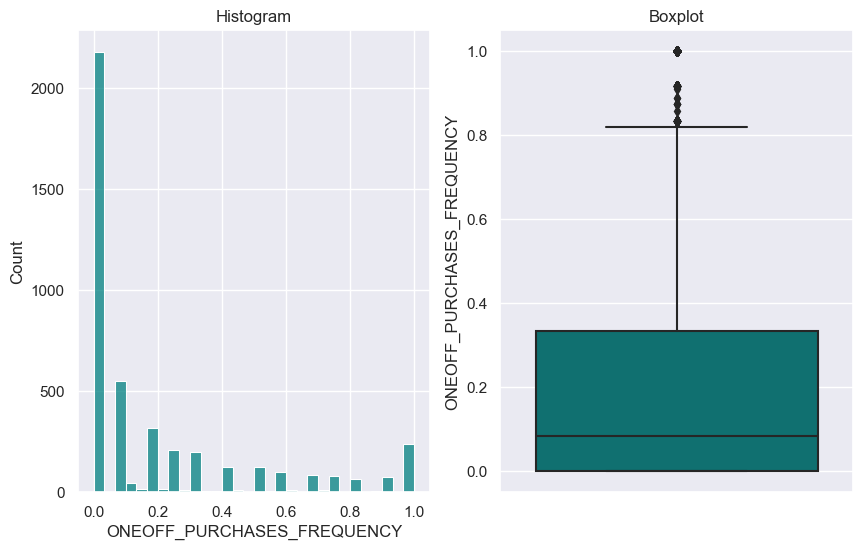


ONEOFF_PURCHASES_FREQUENCY - After Capping


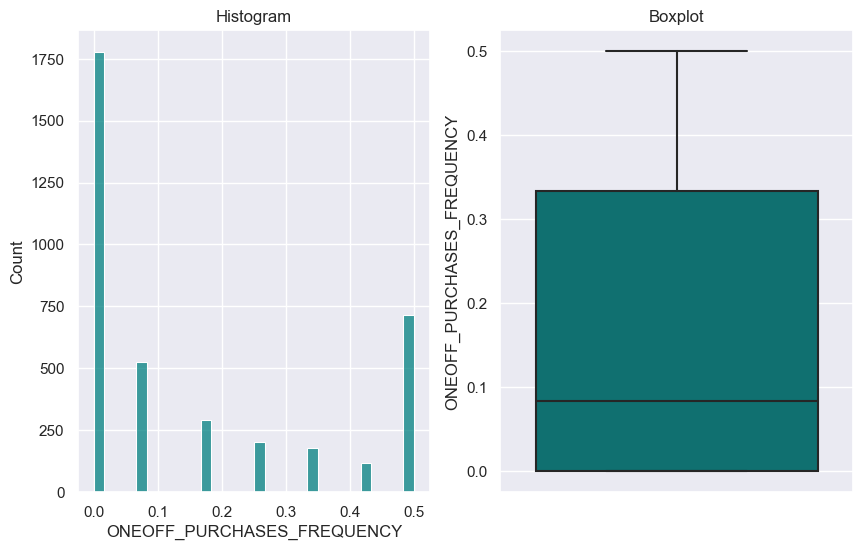

PURCHASES_INSTALLMENTS_FREQUENCY - Before Capping


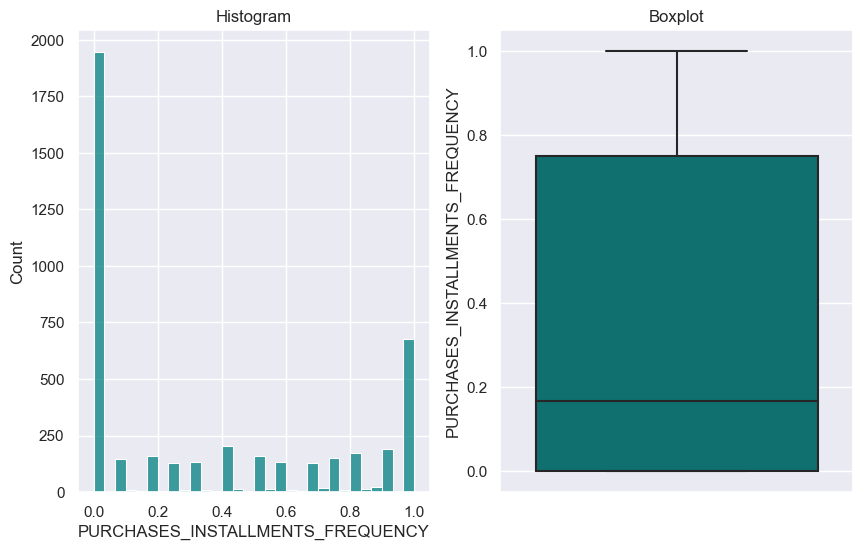


PURCHASES_INSTALLMENTS_FREQUENCY - After Capping


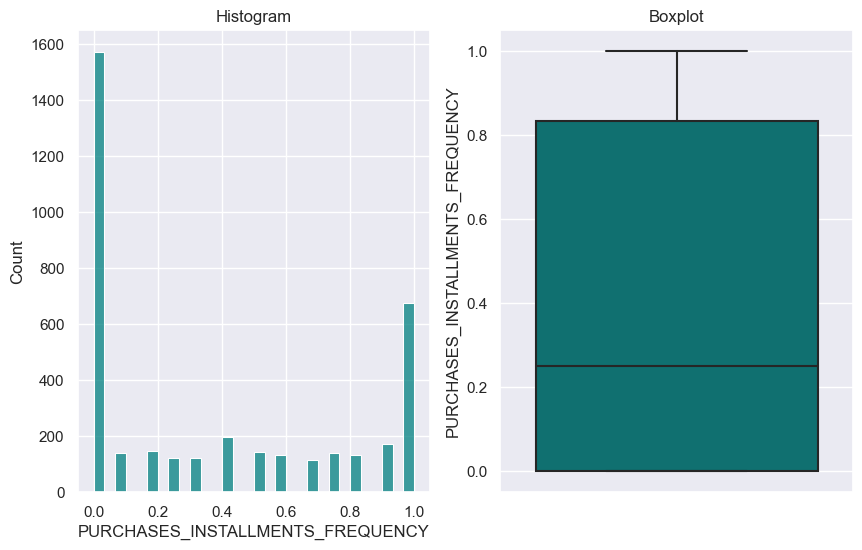

CASH_ADVANCE_FREQUENCY - Before Capping


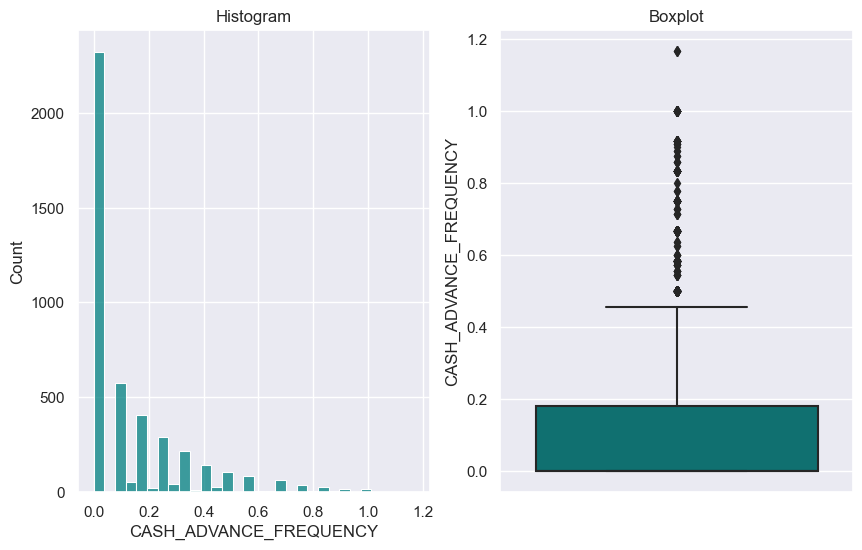


CASH_ADVANCE_FREQUENCY - After Capping


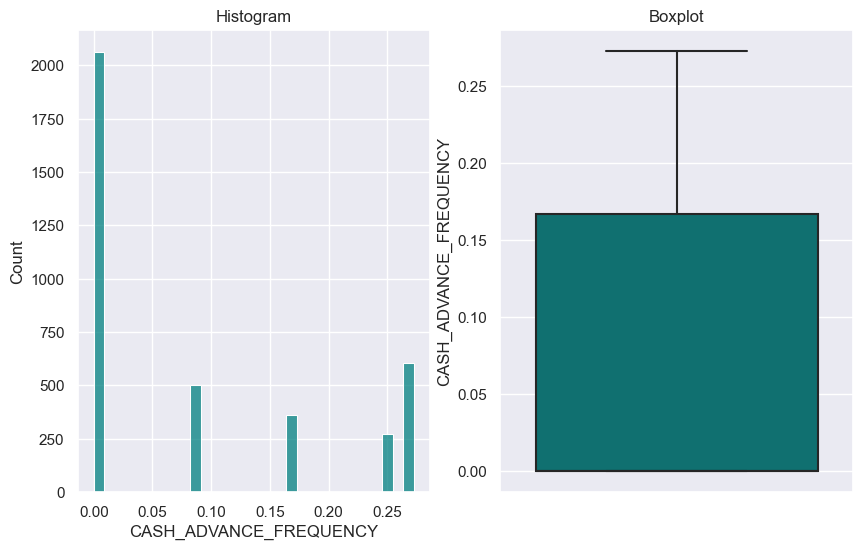

CASH_ADVANCE_TRX - Before Capping


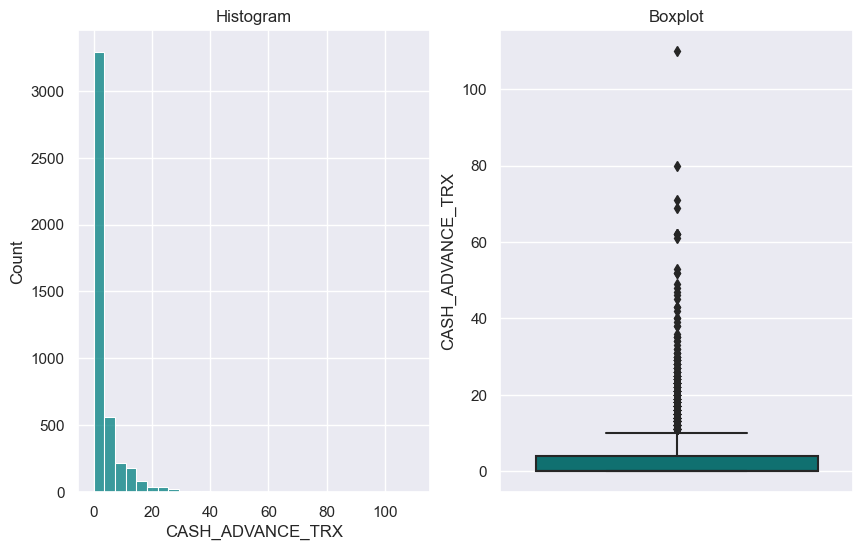


CASH_ADVANCE_TRX - After Capping


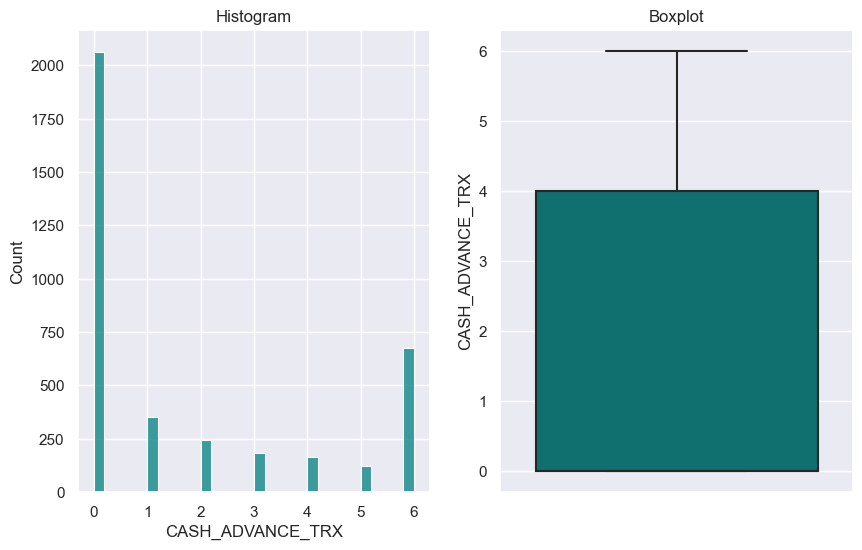

PURCHASES_TRX - Before Capping


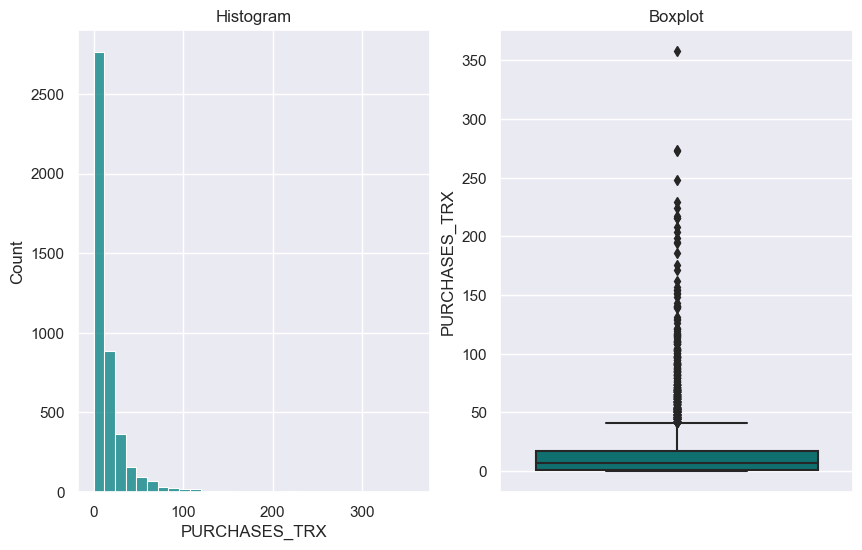


PURCHASES_TRX - After Capping


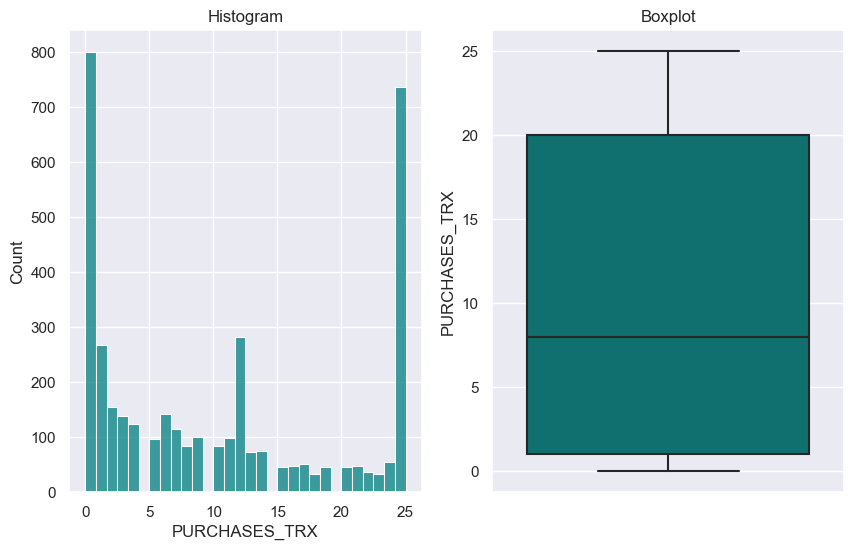

CREDIT_LIMIT - Before Capping


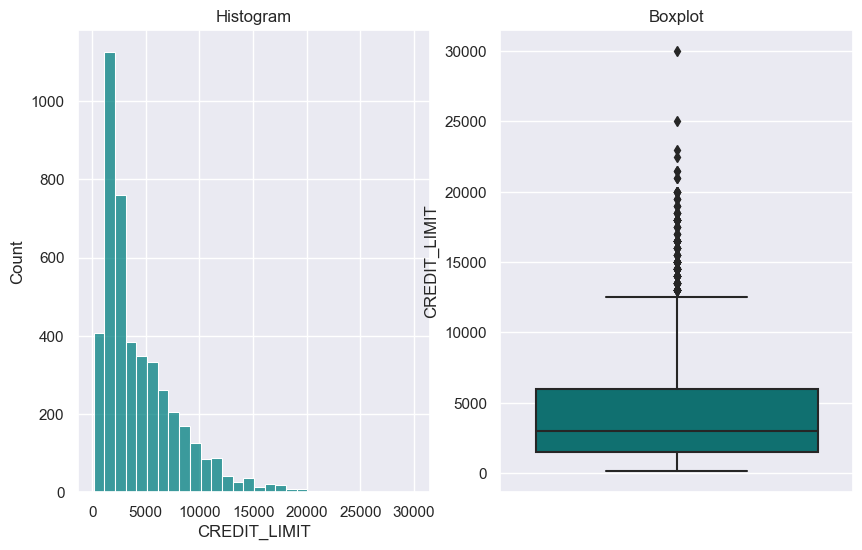


CREDIT_LIMIT - After Capping


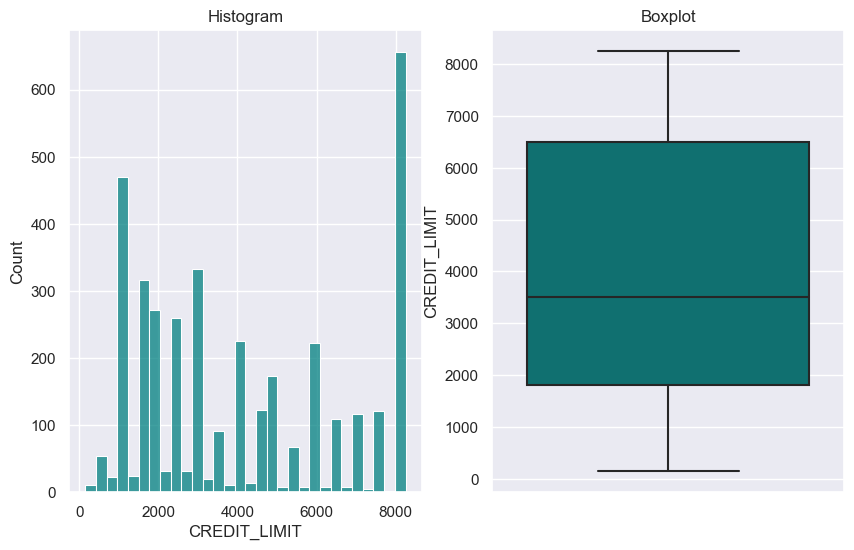

PAYMENTS - Before Capping


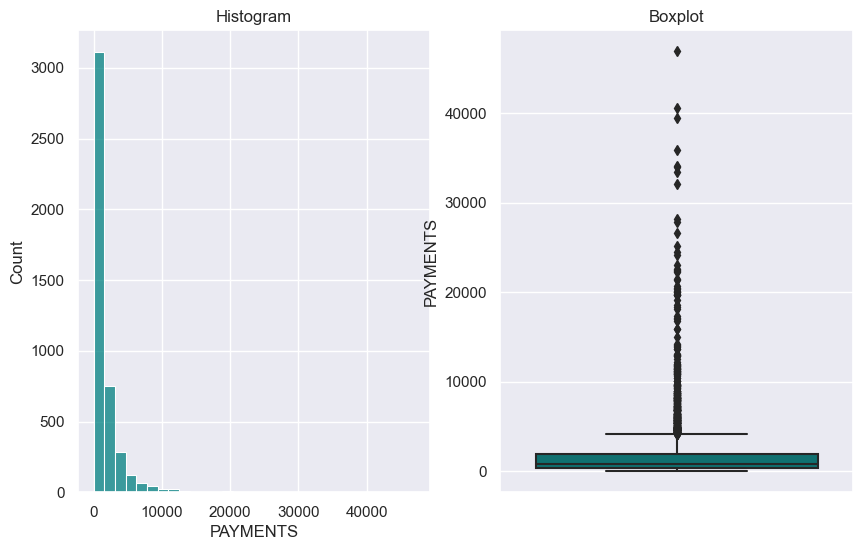


PAYMENTS - After Capping


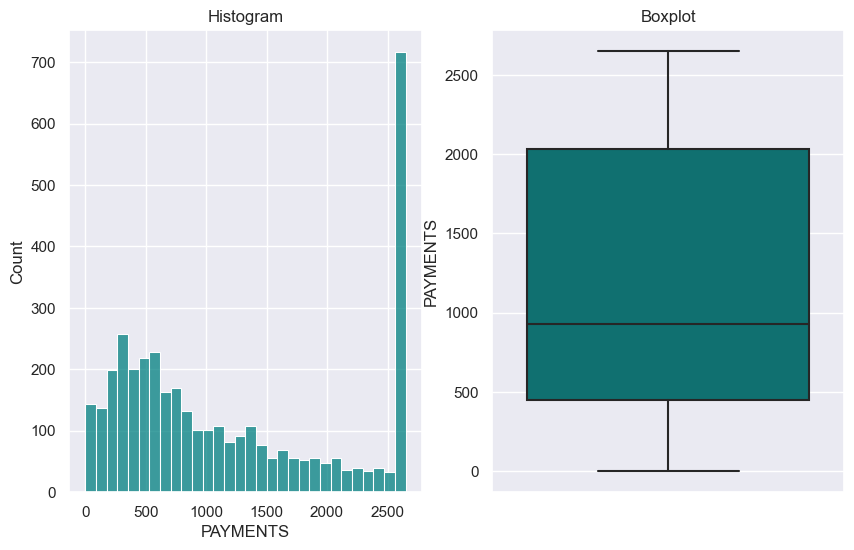

MINIMUM_PAYMENTS - Before Capping


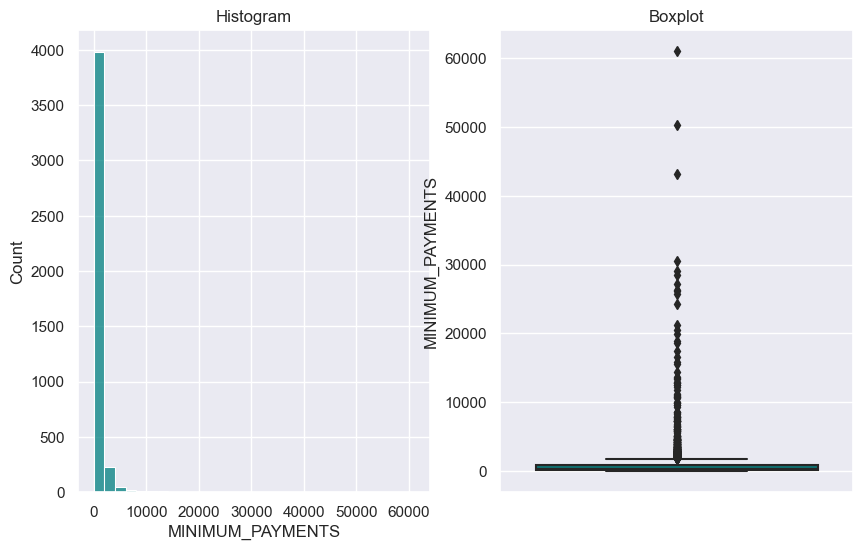


MINIMUM_PAYMENTS - After Capping


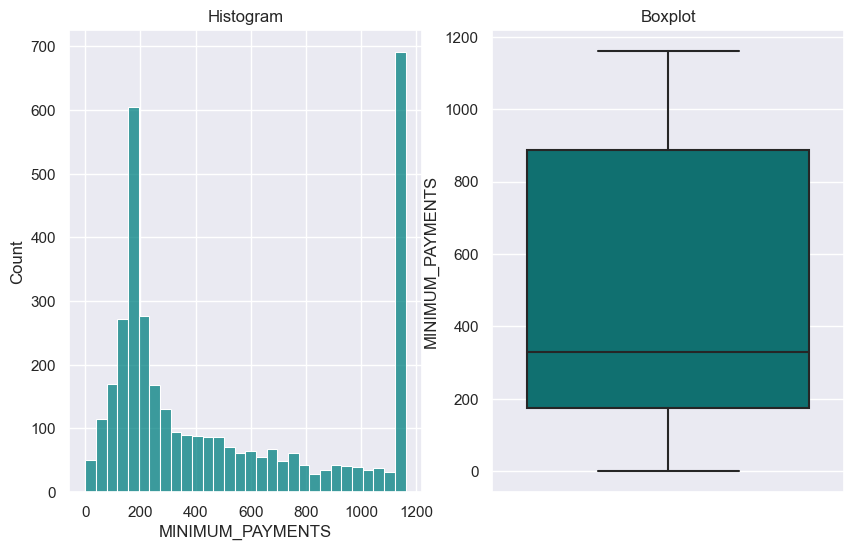

PRC_FULL_PAYMENT - Before Capping


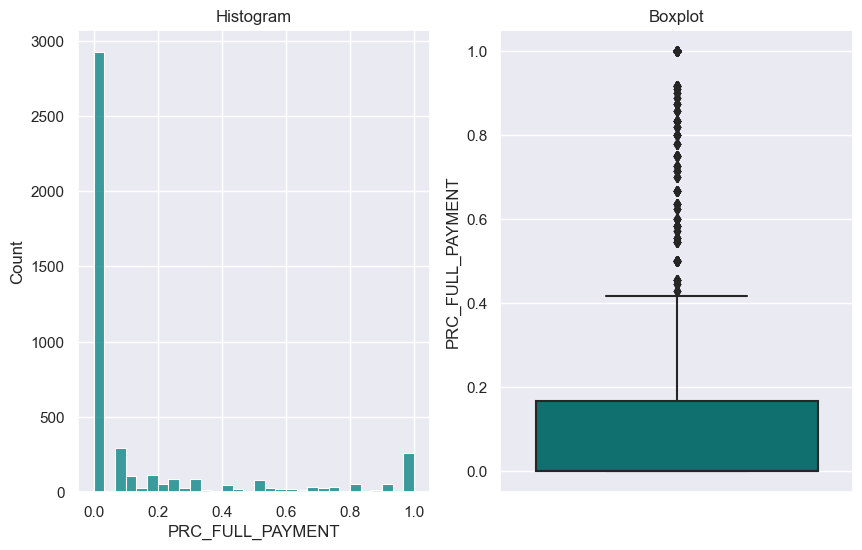


PRC_FULL_PAYMENT - After Capping


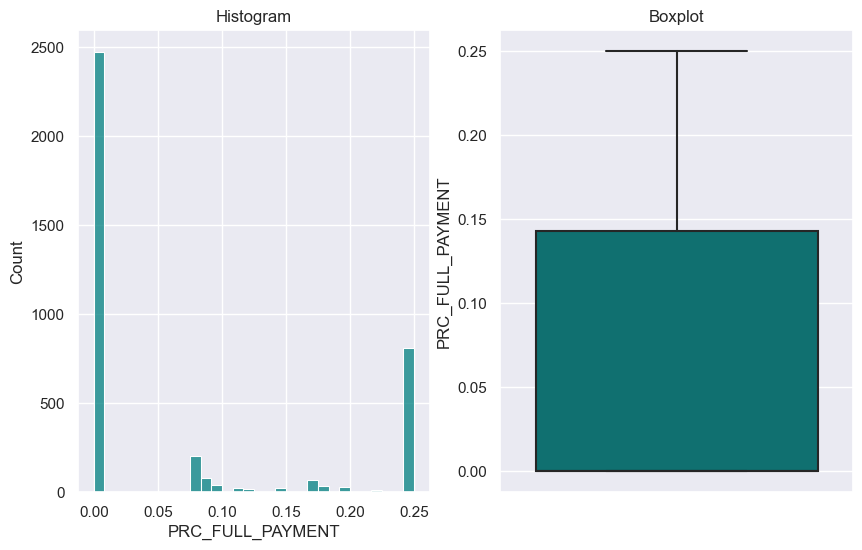

TENURE - Before Capping


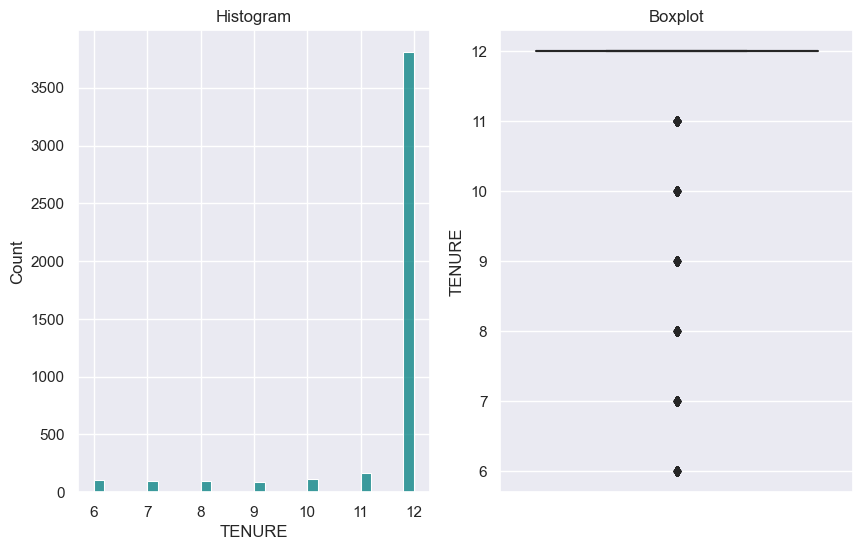


TENURE - After Capping


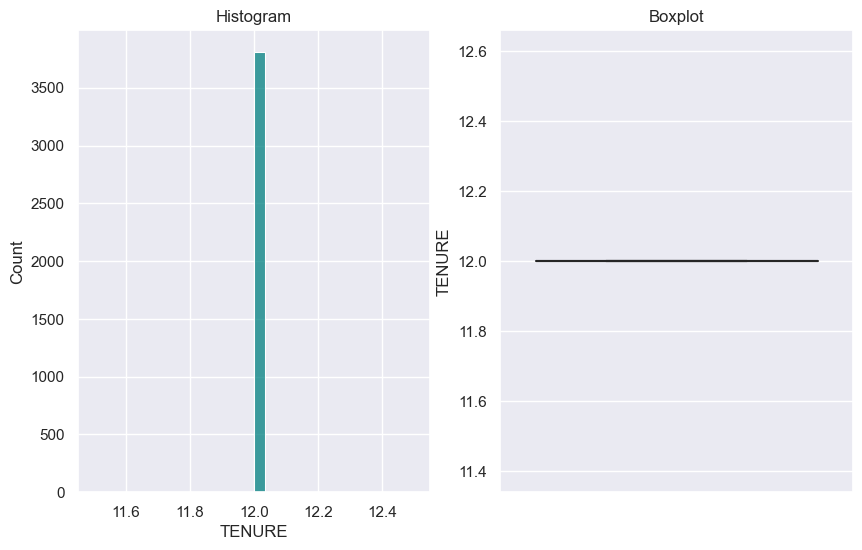

In [290]:
# Plotting histogram and boxplot before and after capping
for col in df_trimmed.columns:
  print(f'{col} - Before Capping')
  diagnostic_plots(df, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(df_trimmed, col)


Setelah di handling, nampak bahwa seluruh data sudah tidak memiliki outliers, hal ini bisa dilihat dari hasil boxplot sesudah di handling. namum pada sebaran datanya, nampak setelah di handling, sebaran datanya masih berdistribusi skew.

## **Handling Missing Value**

 Selanjutnya kita akan memeriksa Missing Value pada setiap variabel, missing value bisa menyebabkan kegagalan dalam melakukan train model nantinya

In [291]:
#Mencari Mssing Value pada X_train
null_values = df_trimmed.isnull()
null_count = null_values.sum()
print(null_count)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    123
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Dari hasil analisis, diketahui bahwa kolom MINIMUM_PAYMENTS memiliki 123 Missing value pada datanya. kemudian akan lihat terlebih dahulu data yang mengandung Missing Value sebelum dipututkan handling apa yang akan dilakukan.

In [292]:
df_trimmed[df_trimmed['MINIMUM_PAYMENTS'].isnull()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
27       0.000000           0.833334      66.75              0.00   
32       0.401279           0.833334      31.50              0.00   
78      18.906225           0.833334     143.73              0.00   
92    2329.485768           1.000000     213.34            213.34   
93    1311.995984           1.000000    1283.90            870.48   
...           ...                ...        ...               ...   
4029   192.259790           0.833334      86.03             86.03   
4040  2174.018945           1.000000     377.10            177.62   
4049  2242.311686           1.000000     437.00             97.00   
4087  1948.434315           1.000000     324.30            324.30   
4091  3021.510568           1.000000     541.68            541.68   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
27                     66.75      0.000000             0.250000   
32                     31.50      0.000000             0.250000   
78                    143.73      0.000000             0.250000   
92                      0.00      0.000000             0.250000   
93                      0.00      0.000000             0.250000   
...                      ...           ...                  ...   
4029                    0.00    997.125484             0.083333   
4040                  199.48    388.849566             0.333333   
4049                  340.00    184.648692             0.333333   
4087                    0.00   1468.083560             0.166667   
4091                    0.00   1647.854943             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
27                      0.000000                          0.250000   
32                      0.000000                          0.250000   
78                      0.000000                          0.166667   
92                      0.250000                          0.000000   
93                      0.250000                          0.000000   
...                          ...                               ...   
4029                    0.083333                          0.000000   
4040                    0.083333                          0.250000   
4049                    0.083333                          0.333333   
4087                    0.166667                          0.000000   
4091                    0.166667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
27                  0.000000                 0              3        4000.0   
32                  0.000000                 0              3        3000.0   
78                  0.000000                 0              3        2500.0   
92                  0.000000                 0              3        2400.0   
93                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
4029                0.166667                 4              1        1200.0   
4040                0.166667                 2              5        2600.0   
4049                0.166667                 2              5        2400.0   
4087                0.166667                 4              4        5000.0   
4091                0.166667                 2              2        8250.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
27      0.000000               NaN               0.0      12  
32    120.697352               NaN               0.0      12  
78      0.000000               NaN               0.0      12  
92      0.000000               NaN               0.0      12  
93      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
4029    0.000000               NaN               0.0      12  
4040    0.000000               NaN               0.0      12  
4049    0.000000   

Setelah dilakukan analisis, nampak pada setiap kolom yang mengandung missing value, nilai nya sangat beragam sehingga diasumsikan nilai missing value nya berasal dari error yang tidak disengaja. kemudian diketahui juga nilai missing value nya sedikit sehingga missing value yang ada bisa di drop saja.

In [293]:
# Menghapus nilai yang hilang dari DataFrame dan menyimpannya kembali ke df_missing_value
df_missing_value = df_trimmed.dropna()

# Menghitung jumlah nilai yang hilang setelah menghapusnya
missing_values_count = df_missing_value.isnull().sum()

# Menampilkan jumlah nilai yang hilang
print("Jumlah nilai yang hilang setelah penghapusan:", missing_values_count)


Jumlah nilai yang hilang setelah penghapusan: BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## **Handling Outliers 2**

Handling outliers dilakukan kembali karena ada nilai Nan pada beberapa kolom yang diasumsikan ada karena nilai Missing Value pada kolom tersebut sehingga perlu dilakukan checking outliers kembali dan akan dilakukan handling jika terdapat missing valuer pada data tersebut

In [294]:
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in df_missing_value.columns:
    Q1 = np.percentile(df_missing_value[i], 25)
    Q3 = np.percentile(df_missing_value[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(df_missing_value[i] < lower_bound)
    num_outliers_upper = np.sum(df_missing_value[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = df_missing_value.columns
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

Kolom  Jumlah Outlier  Lower Bound  \
0                            BALANCE               0 -2926.438071   
1                  BALANCE_FREQUENCY             890     1.000000   
2                          PURCHASES               0 -1772.872500   
3                   ONEOFF_PURCHASES               0  -981.397500   
4             INSTALLMENTS_PURCHASES               0  -834.622500   
5                       CASH_ADVANCE               0 -1489.054981   
6                PURCHASES_FREQUENCY               0    -1.291667   
7         ONEOFF_PURCHASES_FREQUENCY               0    -0.499999   
8   PURCHASES_INSTALLMENTS_FREQUENCY               0    -1.249999   
9             CASH_ADVANCE_FREQUENCY               0    -0.250001   
10                  CASH_ADVANCE_TRX               0    -6.000000   
11                     PURCHASES_TRX               0   -27.500000   
12                      CREDIT_LIMIT               0 -5250.000000   
13                          PAYMENTS               0 -1917.820786   
14                  MINIMUM_PAYMENTS               0  -895.212438   
15                  PRC_FULL_PAYMENT               0    -0.250001   
16                            TENURE               0    12.000000   

     Upper Bound  
0    5315.328568  
1       1.000000  
2    3106.787500  
3    1635.662500  
4    1391.037500  
5    2481.758301  
6       2.375001  
7       0.833333  
8       2.083333  
9       0.416668  
10     10.000000  
11     48.500000  
12  13550.000000  
13   4474.864691  
14   1957.509927  
15      0.416668  
16     12.000000

Dari hasil analisis, diketahui kembali bahwa terdapat nilai outliers pada data, sehingga perlu dilakukan handling kembali. Kemudian akan digunakan trimming untuk melakukan handling dikarenakan nilai variansi dari kolom sangat kecil.

In [295]:
# Dapatkan batas atas dan batas bawah untuk 'BALANCE_FREQUENCY'
upper_bound = outliers.loc[outliers['Kolom'] == 'BALANCE_FREQUENCY', 'Upper Bound'].values[0]
lower_bound = outliers.loc[outliers['Kolom'] == 'BALANCE_FREQUENCY', 'Lower Bound'].values[0]

# Flag the outliers in category `BALANCE_FREQUENCY`
outliers_BALANCE_FREQUENCY = np.where((df_missing_value['BALANCE_FREQUENCY'] > upper_bound) |
                                    (df_missing_value['BALANCE_FREQUENCY'] < lower_bound), True, False)

df_outlier2 = df_missing_value.loc[~(outliers_BALANCE_FREQUENCY)]


## **Feature Selection**

Setelah melakukan pengecekan missing value, selanjutnya kita akan memilih kolom yang mempunyai hubungan atau korelasi kuat dengan kolom lainnya.

In [296]:
# Menghitung matriks korelasi antar kolom
correlation_matrix = df_outlier2.corr()

# Menentukan ambang batas untuk kategori korelasi
threshold_strong = 0.7
threshold_moderate = 0.3

# Menginisialisasi dictionary untuk menyimpan kelompok-kelompok korelasi
correlation_groups = {'Strong Correlation': [], 'Moderate Correlation': [], 'Weak Correlation': []}

# Iterasi melalui matriks korelasi dan kelompokkan kolom berdasarkan nilai korelasinya
for col in correlation_matrix.columns:
    for index, row_value in correlation_matrix[col].items():
        if col != index:  # Menghindari korelasi kolom dengan dirinya sendiri
            if abs(row_value) >= threshold_strong:
                correlation_groups['Strong Correlation'].append((col, index, row_value))
            elif abs(row_value) >= threshold_moderate:
                correlation_groups['Moderate Correlation'].append((col, index, row_value))
            else:
                correlation_groups['Weak Correlation'].append((col, index, row_value))

# Menampilkan kelompok-kelompok korelasi bersama dengan kolom-kolom yang termasuk dalam setiap kelompok
for group, columns in correlation_groups.items():
    print(f"===== {group} =====")
    for col1, col2, value in columns:
        print(f"{col1} dan {col2}: {value}")
    print("\n")


===== Strong Correlation =====
BALANCE dan MINIMUM_PAYMENTS: 0.8379577703768105
PURCHASES dan ONEOFF_PURCHASES: 0.7922028269993406
PURCHASES dan INSTALLMENTS_PURCHASES: 0.724616835574726
PURCHASES dan PURCHASES_FREQUENCY: 0.7289217083202627
PURCHASES dan PURCHASES_TRX: 0.8371046956240145
ONEOFF_PURCHASES dan PURCHASES: 0.7922028269993406
ONEOFF_PURCHASES dan ONEOFF_PURCHASES_FREQUENCY: 0.8848838289272128
INSTALLMENTS_PURCHASES dan PURCHASES: 0.724616835574726
INSTALLMENTS_PURCHASES dan PURCHASES_FREQUENCY: 0.7625095001555751
INSTALLMENTS_PURCHASES dan PURCHASES_INSTALLMENTS_FREQUENCY: 0.8565910052443299
INSTALLMENTS_PURCHASES dan PURCHASES_TRX: 0.7570238153911925
CASH_ADVANCE dan CASH_ADVANCE_FREQUENCY: 0.8125878932038973
CASH_ADVANCE dan CASH_ADVANCE_TRX: 0.8460571454663879
PURCHASES_FREQUENCY dan PURCHASES: 0.7289217083202627
PURCHASES_FREQUENCY dan INSTALLMENTS_PURCHASES: 0.7625095001555751
PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY: 0.8566070818476863
PURCHASES_FREQUE

Dari hasil analisis, diketahui bahwa kolom tenure memiliki nilai korelasi yang paling rendah pada semua kolom pada semua kolom pada dataset sehingga kolom tenure akan di drop

In [297]:
#drop kolom
df_fs = df_outlier2.drop('TENURE', axis = 1)

## **Encoding**

#### Pada feature selection kali ini kita tidak melakukan encoding karena tidak terdapat data yang bertipe string atau tipe kategori lainnya.

## **Scalling**

#### Selanjutnya kita akan melakukan scalling untuk menyamakan rentang data pada kolom fitur dan test nya. tapi sebelumnya kita akan melihat sebaran datanya untuk mengetahui jenis scalling apa yang cocok digunakan pada scalling kali ini

In [298]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_fs.columns:
    skewness = df_fs[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'PRC_FULL_PAYMENT']
kolom yang mempunyai nilai skewness normal: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


Untuk kolom yang memliki distribusi normal, kita akan melakukan standar scalling, sedangkan untuk nilai yang memiliki skew distribution, kita akan gunakan Robust scalling

In [299]:
#melakukan scalling menggunakan standard scaller
standard_scaler = StandardScaler()
standard_scaler.fit(df_fs[nilai_skew_normal])
df_fs[nilai_skew_normal] = standard_scaler.transform(df_fs[nilai_skew_normal])


In [300]:
#melakukan scalling menggunakan robust scaller
robust_scaler = RobustScaler()
robust_scaler.fit(df_fs[nilai_skew])
df_fs[nilai_skew] = robust_scaler.transform(df_fs[nilai_skew])

Membuat dataframe baru hasil dari scalling sebagai df.final

In [301]:
df_final = df_fs
df_final

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
10   -0.590175                0.0  -0.997015         -0.093065   
12   -0.599324                0.0  -0.084218         -0.093065   
13    1.388021                0.0  -0.458936         -0.093065   
14   -0.885841                0.0  -0.984082         -0.093065   
17   -0.857303                0.0   0.589052          1.013188   
...        ...                ...        ...               ...   
4443  1.388021                0.0   1.478115          1.013188   
4444  1.388021                0.0   1.173405          1.013188   
4445  1.388021                0.0   0.998743          1.013188   
4446  0.331854                0.0   1.478115          0.171896   
4447 -0.290829                0.0   0.236967          0.987352   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
10                 -0.156119     -0.048669            -0.716221   
12                  0.813331     -0.048669            -0.716221   
13                  0.415356     -0.048669            -0.716221   
14                 -0.142383     -0.048669            -0.716221   
17                 -0.222645     -0.048669            -0.716221   
...                      ...           ...                  ...   
4443               -0.007403      1.373695             0.690047   
4444                0.563667      1.373695             0.690047   
4445                0.525196      1.373695             0.690047   
4446                0.953969      1.373695             0.690047   
4447               -0.222645      1.373695            -0.314429   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
10                     -0.199999                         -0.398537   
12                     -0.199999                         -0.398537   
13                     -0.199999                         -0.398537   
14                     -0.199999                         -0.398537   
17                      0.400000                         -0.991884   
...                          ...                               ...   
4443                    0.999999                         -0.596319   
4444                    0.999999                          0.590374   
4445                    0.999999                          0.985936   
4446                    0.200001                          0.788155   
4447                    0.800001                         -0.991884   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
10                 -0.907833              -0.2      -0.856305     -0.503135   
12                 -0.907833              -0.2      -0.754906     -0.804171   
13                 -0.907833              -0.2      -0.349308      0.625748   
14                 -0.907833              -0.2      -0.856305     -0.691283   
17                 -0.907833              -0.2      -0.856305      0.625748   
...                      ...               ...            ...           ...   
4443                1.471794               1.0       1.374479      1.472410   
4444                1.471794               1.0       1.171680      1.472410   
4445                1.471794               1.0       0.968882      0.625748   
4446                1.471794               1.0       1.374479      0.437600   
4447                1.471794               1.0      -0.349308     -0.691283   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
10    0.141418         -0.925541          0.000000  
12   -1.228944         -0.871895          0.000000  
13    0.287130          1.421266          0.000000  
14   -1.015061         -0.891987          0.000000  
17   -0.882221         -1.034875          0.000000  
...        ...               ...               ...  
4443  1.558117          1.421266          1.090912  
4444  0.426324          1.421266          0.000000  
4445  1.059598          1.421266          0.000000  
4446 -0.956598         -0.101149          0.000000  
4447  1.558117         -0.311780    

## **Dimensional Reduction**

Sebelum melakukan clustering, dimensionality reduction  yang akan digunakan adalah PCA karena:

1. Banyaknya kolom yang digunakan.

2. Banyak kasus telah menunjukkan bahwa ketika KMeans menggunakan hasil PCA, hasil pengelompokannya lebih baik daripada tanpa menggunakan PCA. Jika Anda tertarik untuk mengeksplorasi hubungan antara PCA dan KMeans, Anda dapat membaca yang berikut ini. [journal](https://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf).

In [302]:
#PCA 
pca = PCA()
pca.fit(df_final)

PCA()

Text(0, 0.5, 'Eigenvalues')

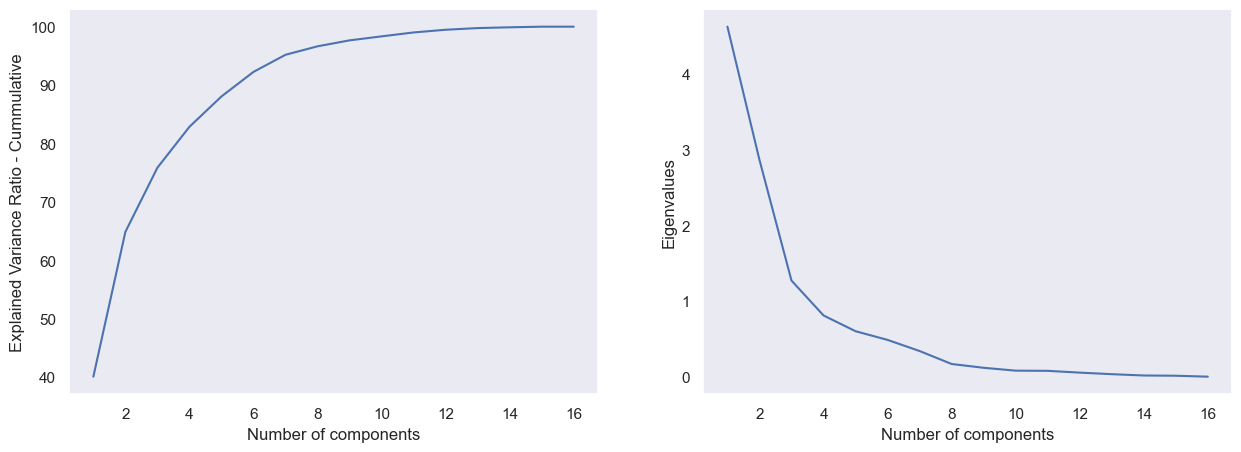

In [303]:
#Visualisasi PCA

# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1,17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1,17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Berdasarkan plot diatas, akan digunakan Explained variance ratio-cummulative = 95% untuk data kali ini

In [304]:
pca_final = PCA(n_components=0.95)
pca_final.fit(df_final)

df_final_pca = pca_final.transform(df_final)

# **Model Defition**

KMeans adalah suatu teknik clustering yang digunakan untuk membagi data menjadi kelompok-kelompok yang homogen berdasarkan atribut-atribut tertentu. Kmeans digunakan pada model kali ini karena dataset yang ada tidak memiliki target serta dataset ini ingin dilakukan segmentasi berdasarkan karekteristik antar data sehingga bisa menciptakan kelompok yang dapat mencerminkan kehomogenan suatu kelompok. Pada Kmeans kali ini akan digunakan:

- **n_cluster**: n_cluster adalah hyperparameter pada kmeas yang menentukan jumlah cluster yang akan tercipta nantinya. Pada clustering kali ini akan ditentukan n_cluster yang akan digunakan menlalui elbow plot dan siluet score


# **Model Training**

Pada model training kali ini akan ditentukan terlebih dahulu nilai n_cluster yang optimal menggunakan elbow plot serta siluet score

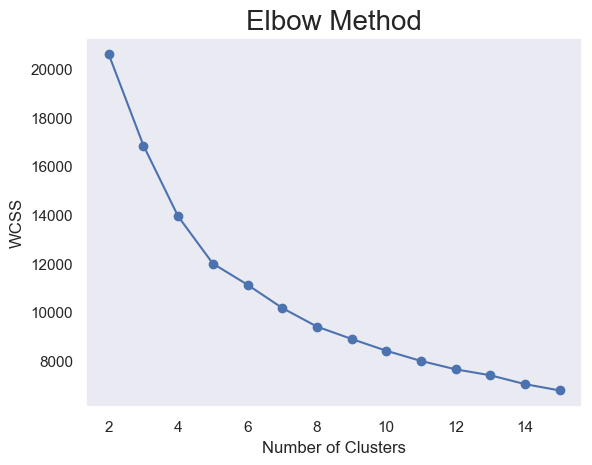

In [305]:
# Find the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_final_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [160]:


def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.30663903182779434
For n_clusters = 3 The average silhouette_score is : 0.26230598086088397
For n_clusters = 4 The average silhouette_score is : 0.24680711762686056
For n_clusters = 5 The average silhouette_score is : 0.22612953926309004
For n_clusters = 6 The average silhouette_score is : 0.231933539062198
For n_clusters = 7 The average silhouette_score is : 0.23044243325803737
For n_clusters = 8 The average silhouette_score is : 0.23169514985909367
For n_clusters = 9 The average silhouette_score is : 0.21606594392763945
For n_clusters = 10 The average silhouette_score is : 0.22064023772562205
For n_clusters = 11 The average silhouette_score is : 0.2166976486308917
For n_clusters = 12 The average silhouette_score is : 0.20733593740364215
For n_clusters = 13 The average silhouette_score is : 0.2184933918996405
For n_clusters = 14 The average silhouette_score is : 0.21298696585624347


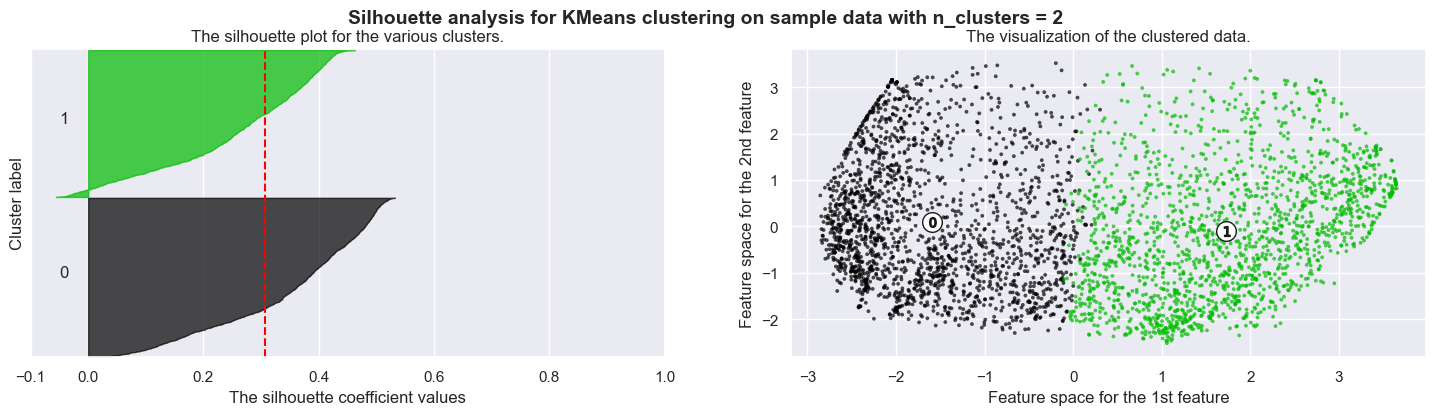

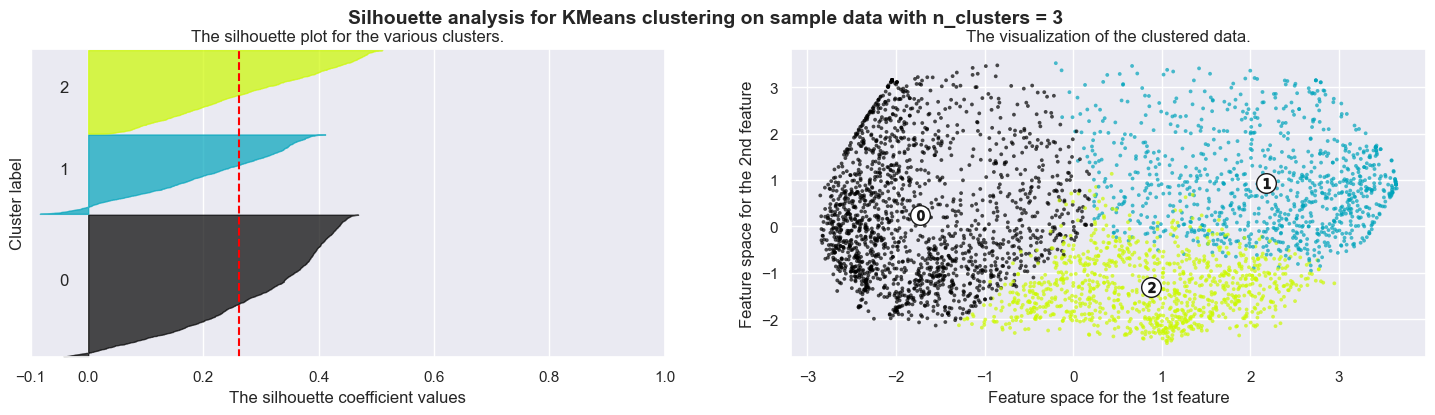

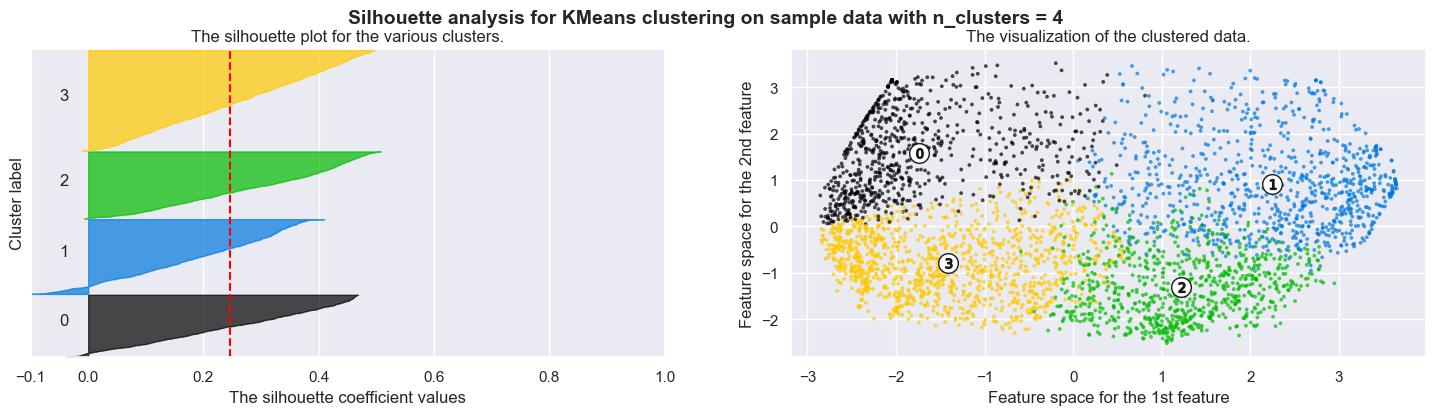

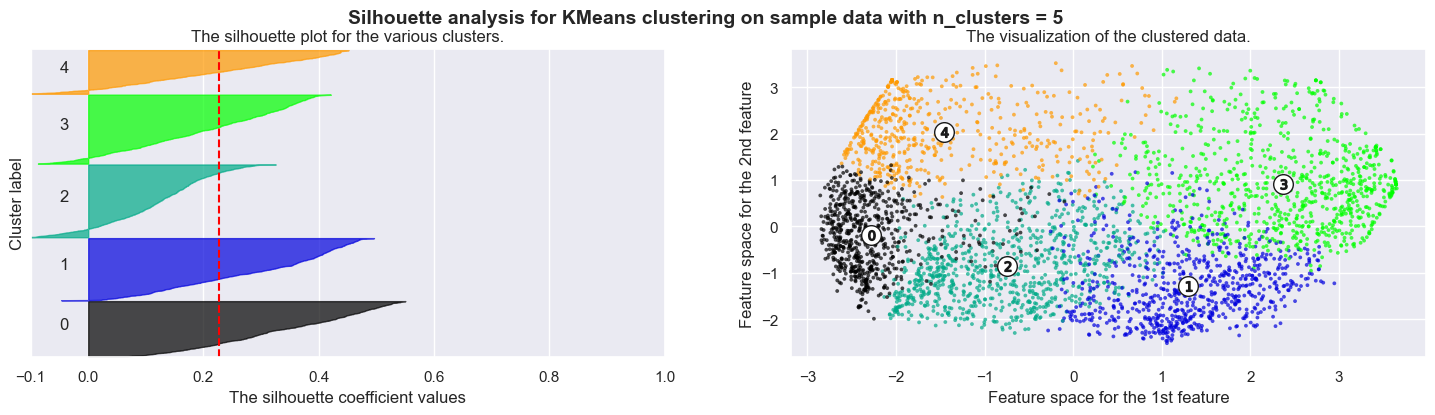

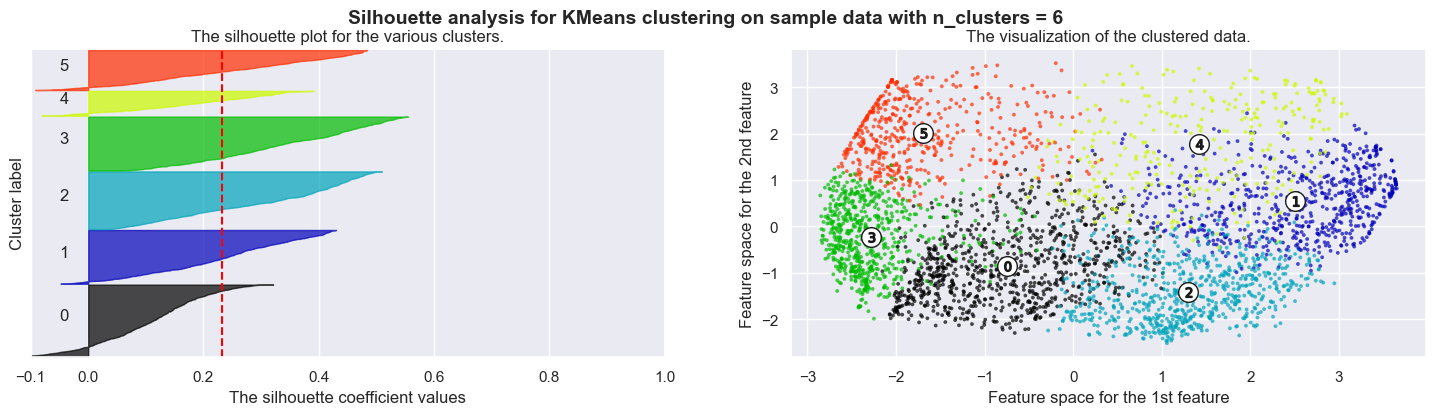

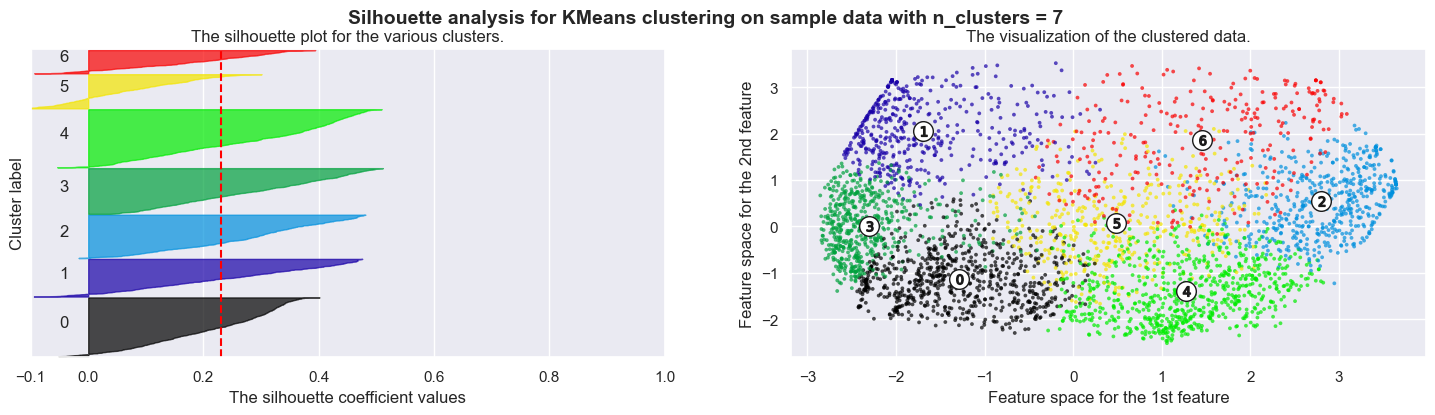

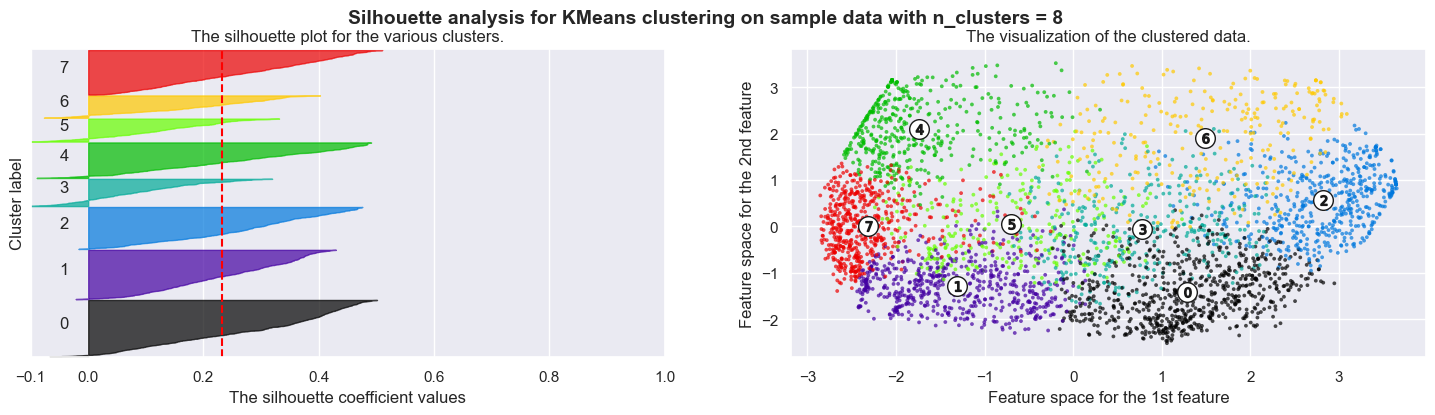

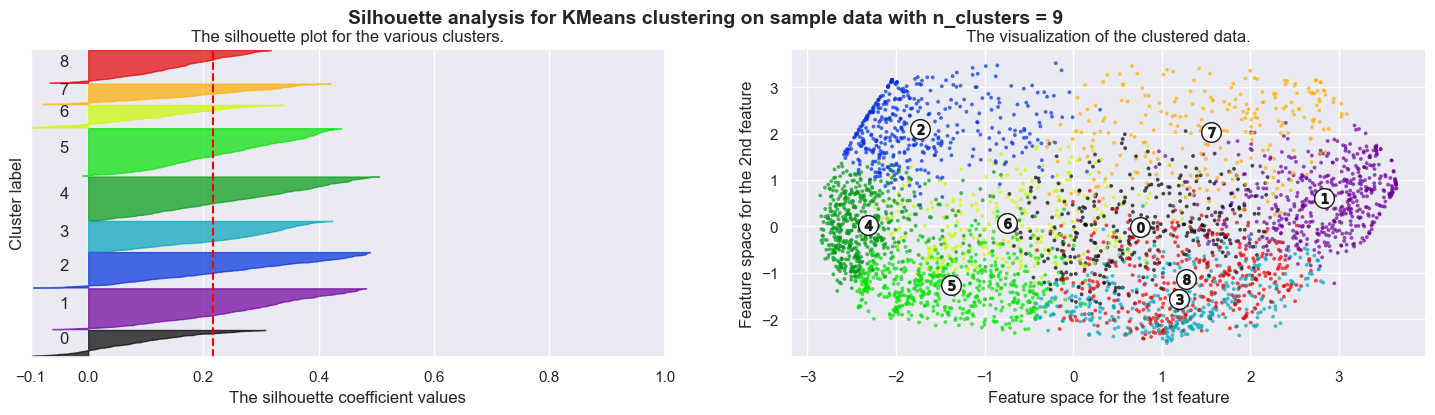

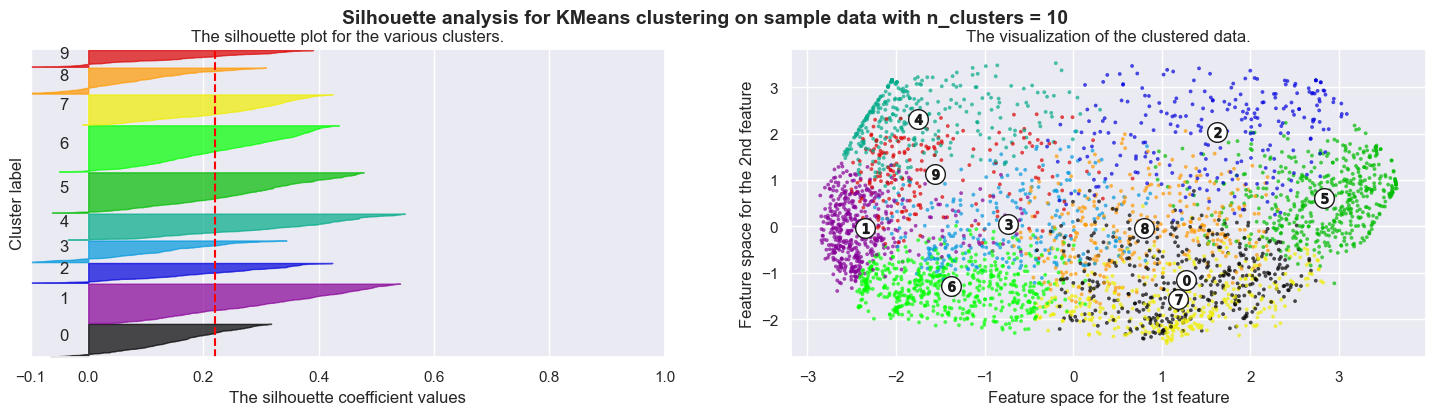

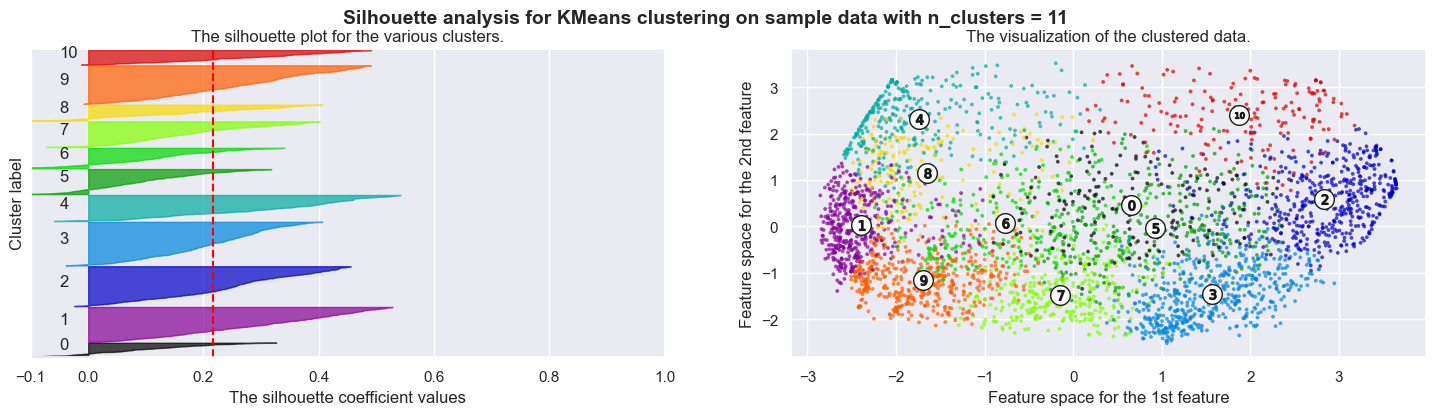

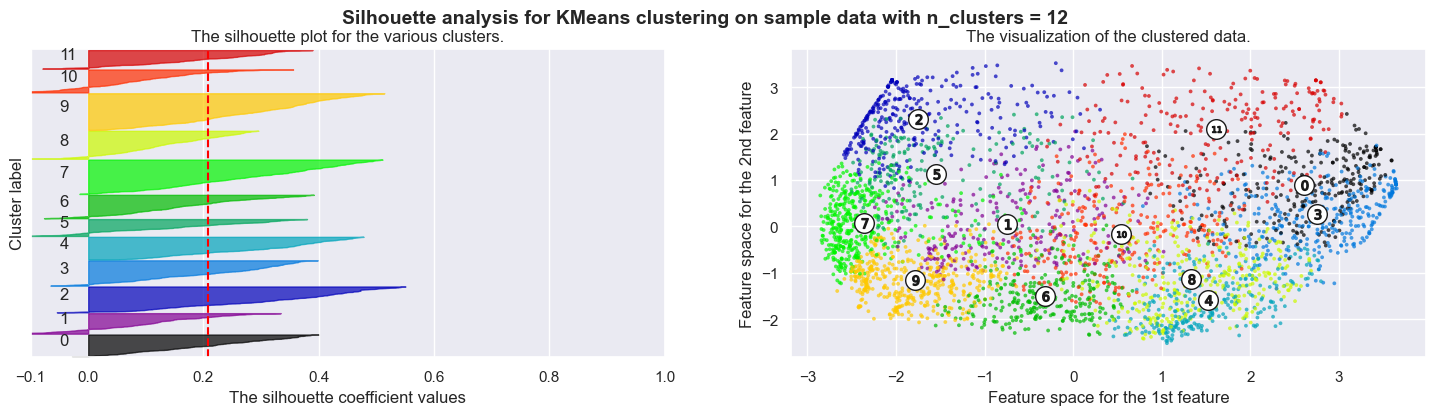

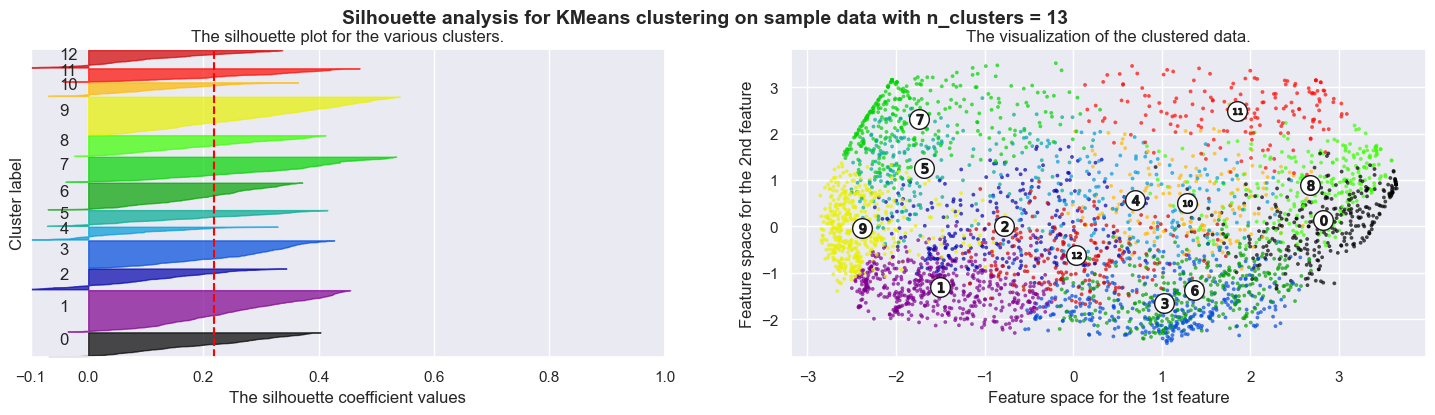

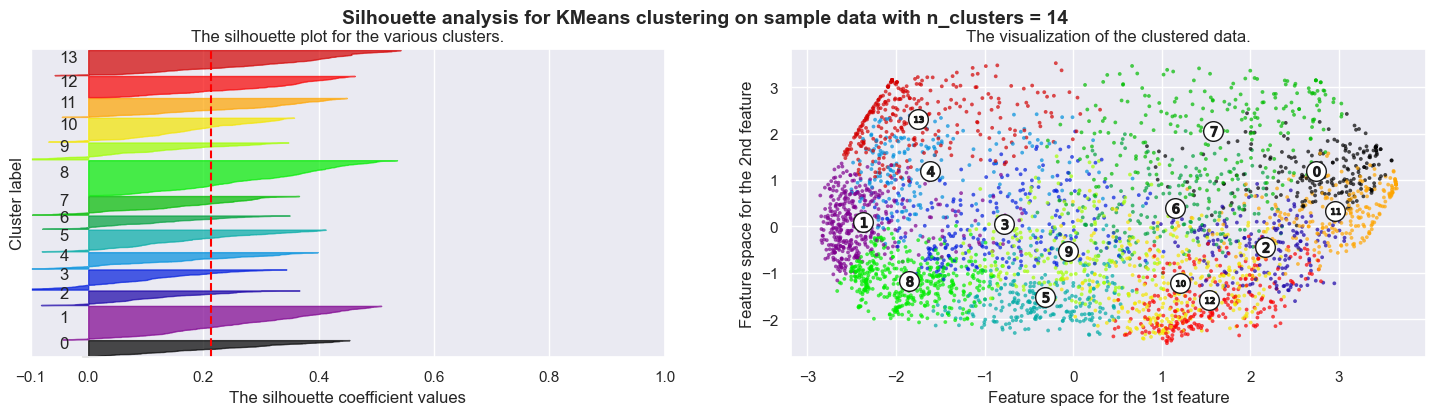

In [161]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_final_pca, random_state)

dari hasil elbow plot dan siluet score, didapatkan bahwa:
- Nilai yang membentuk siku pada nilai ke 4.
- dari siluet score tertinggi ada pada n_cluster = 2 namun pada plotnya masih menyebar dengan jauh, begitu juga dengan n_cluster = 3 namum pada n_cluster sama dengan 4 dpt dilihat bahwa nilai siluetnya tidak terlalu terpaut jauh dengan n_cluster = 2 tetapi plot sebaran datanya sangat baik.

sehingga dari hasil analisis menggunakan elbow plot dan siluet score, makan n_cluster yang akan digunakan adalah n_cluster = 4.

Selanjutnya kita akan melakukan clustering menggunakan kmeans dengan n_cluster = 4

In [306]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 4, random_state = random_state)
pred = km.fit_predict(df_final_pca)
pred

c:\Users\62822\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 3, ..., 2, 2, 3])

Setelah didapatkan nilai cluster, selanjutnya akan di gabungkan pada data original

In [307]:
# Filter DataFrame df_final untuk mempertahankan baris dengan prediksi tertentu
df = df.loc[df_final.index]  # Menggunakan (pred) untuk mempertahankan baris dengan prediksi tertentu

# Tampilkan DataFrame hasil filter
df ['cluster'] = pred
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
10     867.728471                1.0      41.07              0.00   
12     857.767403                1.0     639.56              0.00   
13    5850.172900                1.0     393.87              0.00   
14     545.819208                1.0      49.55              0.00   
17     576.890374                1.0    1081.00           1081.00   
...           ...                ...        ...               ...   
4443  7907.725211                1.0    1685.19           1552.31   
4444  6467.885013                1.0    1464.14            978.71   
4445  5311.078831                1.0    1349.62            887.94   
4446  1871.597836                1.0    3220.25            208.49   
4447  1193.644707                1.0     850.15            850.15   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
10                     41.07      0.000000             0.250000   
12                    639.56      0.000000             0.250000   
13                    393.87      0.000000             0.250000   
14                     49.55      0.000000             0.250000   
17                      0.00      0.000000             0.250000   
...                      ...           ...                  ...   
4443                  132.88   8253.390661             0.833333   
4444                  485.43   3947.867840             0.833333   
4445                  461.68   4258.489193             0.833333   
4446                 3011.76   2367.006699             0.833333   
4447                    0.00   3215.142400             0.416667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
10                      0.000000                          0.250000   
12                      0.000000                          0.250000   
13                      0.000000                          0.250000   
14                      0.000000                          0.250000   
17                      0.250000                          0.000000   
...                          ...                               ...   
4443                    0.750000                          0.166667   
4444                    0.583333                          0.666667   
4445                    0.750000                          0.833333   
4446                    0.166667                          0.750000   
4447                    0.416667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
10                  0.000000                 0              3        3000.0   
12                  0.000000                 0              4        2200.0   
13                  0.000000                 0              8        6000.0   
14                  0.000000                 0              3        2500.0   
17                  0.000000                 0              3        6000.0   
...                      ...               ...            ...           ...   
4443                0.416667                14             27       18500.0   
4444                0.416667                10             23       11500.0   
4445                0.416667                13             21        6000.0   
4446                0.416667                15             28        5500.0   
4447                0.416667                 8              8        2500.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
10     1409.282903        233.788637          0.000000      12        1  
12      210.272469        254.976679          0.000000      12        1  
13     1536.774213       2668.340809          0.000000      12        3  
14      397.410932        247.041179          0.000000      12        1  
17      513.640460        190.606207          0.000000      12        1  
...            ...               ...               ...     ...      ...  
4443  19841.257370       2025.836483          0.090909      12      

Selanjutnya kita akan melihat visualisasi atau ploting dari setiap klaster pada PCA 2 dimensi saja.

<Axes: >

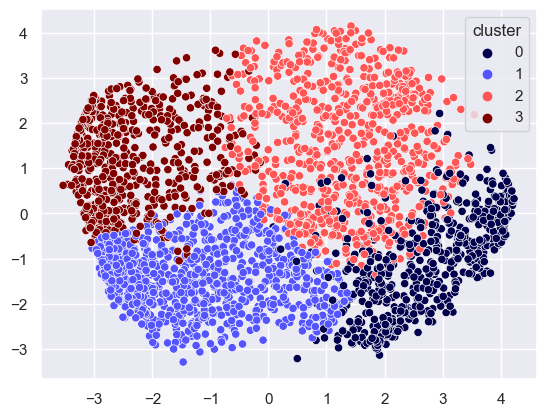

In [308]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_final)

sales_scaled_pca_2d = pca_2d.fit_transform(df_final)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df['cluster'], palette='seismic')

dari plot diatas dapat diketahui:
1. Persebaran kluster
- Kluster 1 (biru): Terkonsentrasi di kuadran kanan atas, menunjukkan nilai tinggi pada PC1 dan PC2.
- Kluster 2 (merah): Terkonsentrasi di kuadran kanan bawah, menunjukkan nilai tinggi pada PC1 dan nilai rendah pada PC2.
- Kluster 3 (Maroon): Terkonsentrasi di kuadran kiri bawah, menunjukkan nilai rendah pada PC1 dan PC2.
- Kluster 4 (ungu): Terkonsentrasi di kuadran kiri atas, menunjukkan nilai rendah pada PC1 dan nilai tinggi pada PC2.
2. Ukuran dan bentuk kluster menunjukkan variabilitas data di dalam kluster tersebut. Kluster yang lebih besar dan lebih tersebar menunjukkan lebih banyak variasi dalam data dibandingkan dengan kluster yang lebih kecil dan lebih kompak.

# **EDA After Clustering**

Tujuan dari EDA setelah klustering ini adalah untuk mengetahui karakteristik dari setiap kluster yang telah dibuat, maka langkah-langkah yang akan dilakukan adalah:
1. melihat persebaran cluster pada setiap kolom dengan kolom 
2. Menyimpulkan karakteristik pada setiap kluster

In [309]:
# Defining a function to create Scatter plot for certain variables
def diagnostic_plots1(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # scatter plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='cluster', y=variable, data=df, color='teal', hue='cluster')
    plt.title('Scatter plot')

    plt.show()


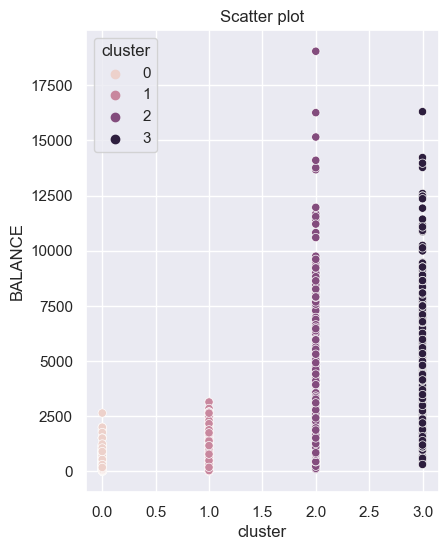

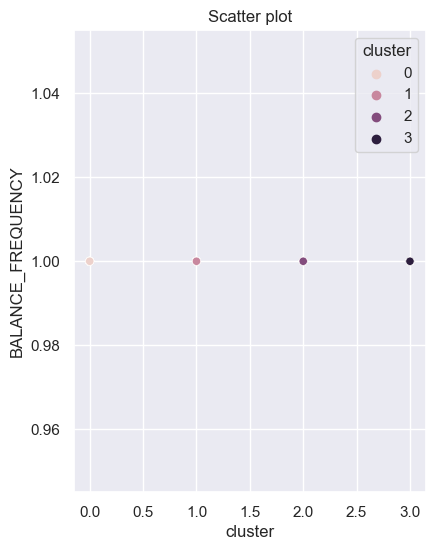

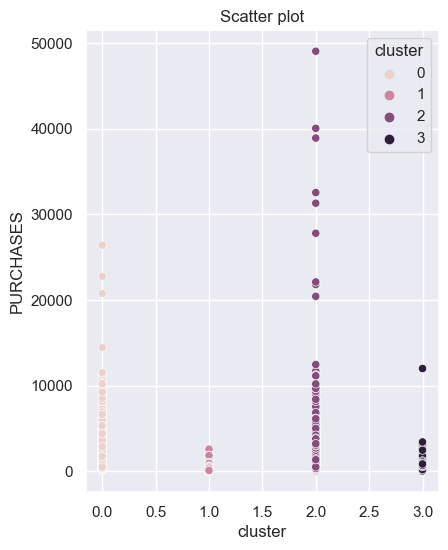

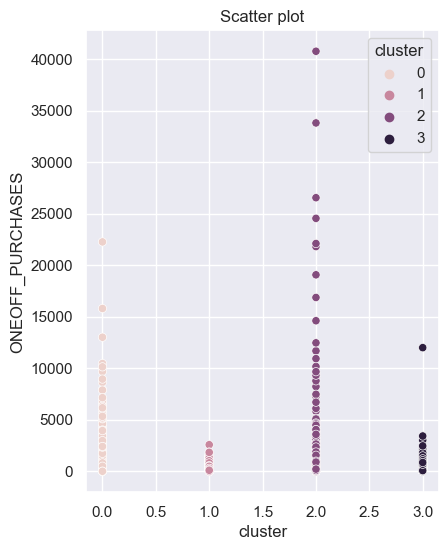

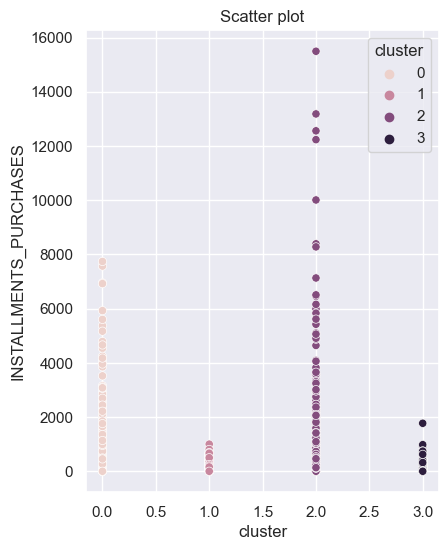

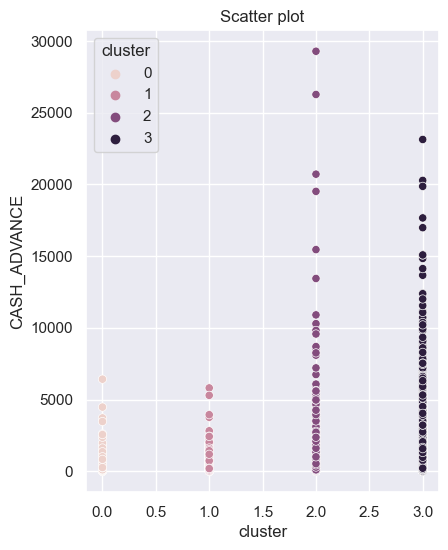

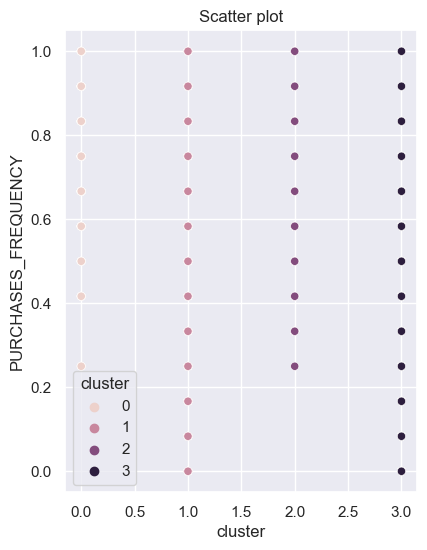

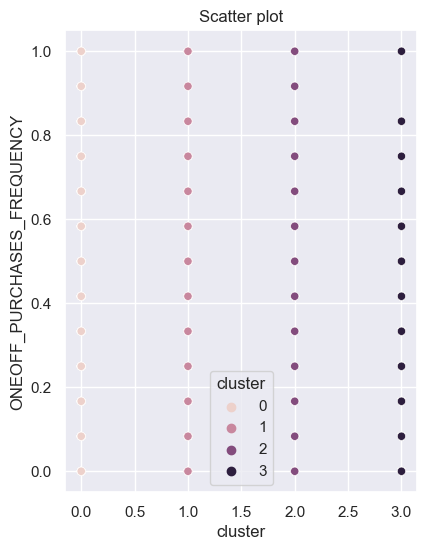

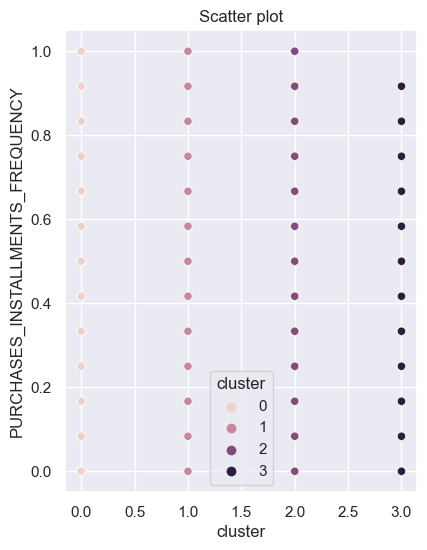

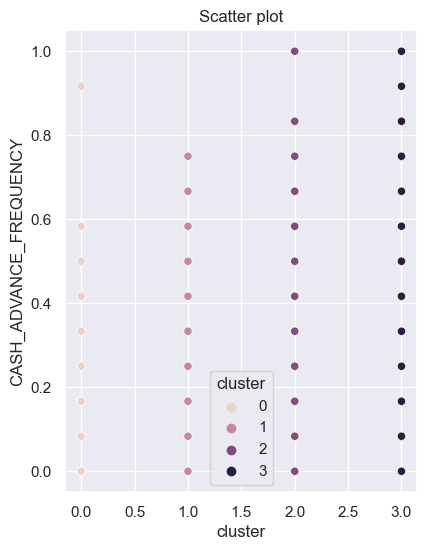

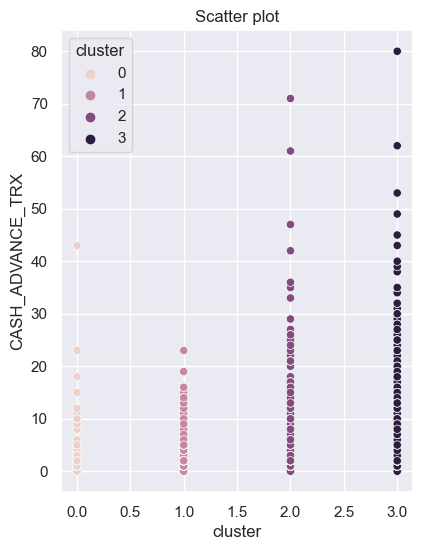

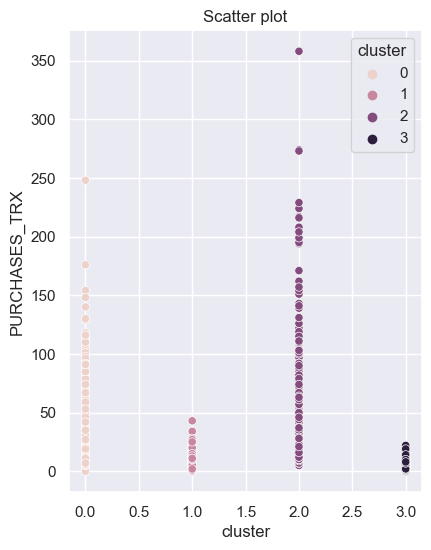

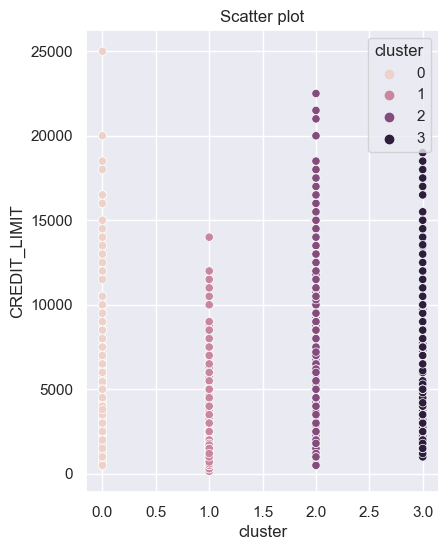

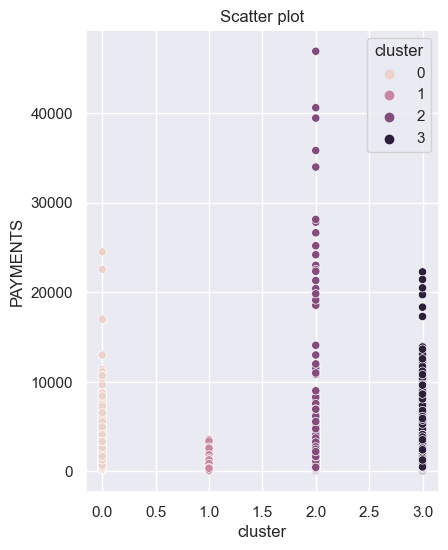

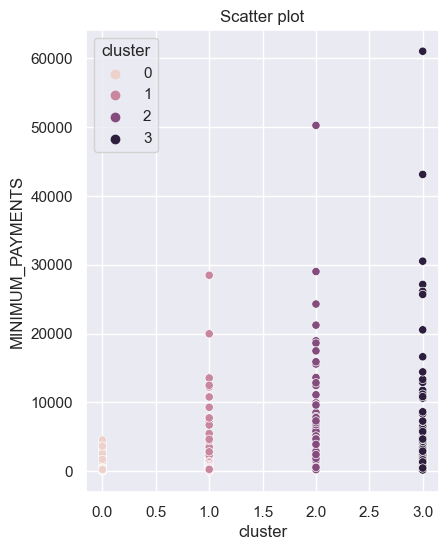

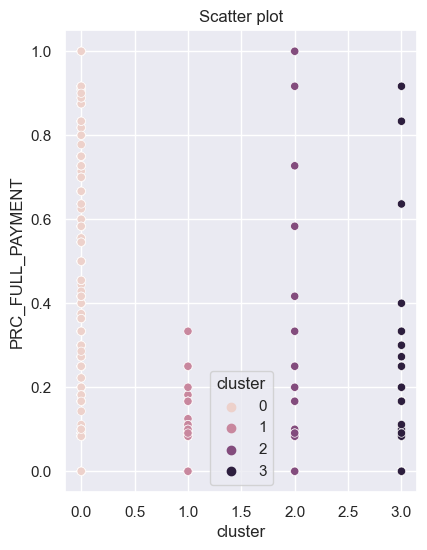

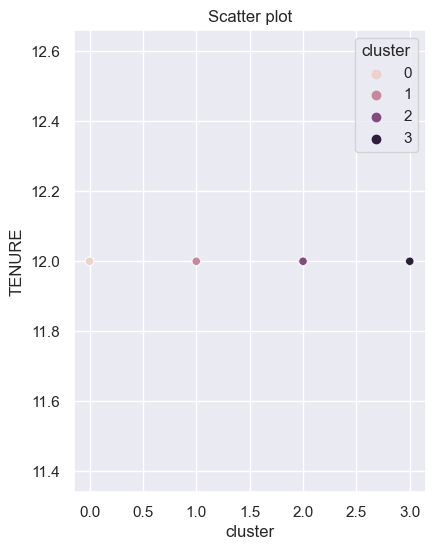

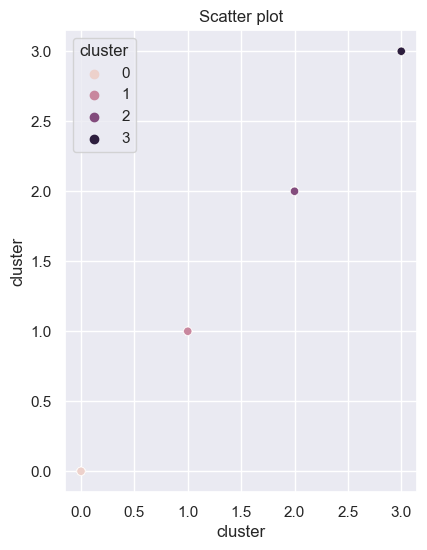

In [310]:
# Looping untuk melihat scatter plot nya
for col in df.columns:
  diagnostic_plots1(df, col)


- dari hasil plotting cluster dan setiap kolom, dapat diketahui bahwa kluster 0 memiliki karakteristik sebagai berikut :
1. Memiliki nilai BALANCE, BALANCE FREQUENCY, CASH ADVICE, PURCHASES FREQUENCY, ONEOFF PURCHASES FREQUENCY, PURCHASES INSTALLMENT FREQUENCY, CASH ADVANCE FREQUENCY, CASH ADVANCE TRX, CREDIT LIMIT, PAYMENTS, MINIMUN PAYMENTS, PRC FULL PAYMENT dengan rentang yang tinggi
2. Memiliki nilai PURCHASES, ONEOFF PURCHASES, INSTALLMENT PURCHASES, dan PURCHASES TRX dengan rentang kecil

- dari hasil plotting cluster dan setiap kolom, dapat diketahui bahwa kluster 1 memiliki karakteristik sebagai berikut :
1. mempunyai rentang nilai yang tinggi pada setiap kolom

- dari hasil plotting cluster dan setiap kolom, dapat diketahui bahwa kluster 2 memiliki karakteristik sebagai berikut :
1. Memiliki nilai BALANCE, PURCHASES, ONEOFF PURCHASES, INSTALLMENT PURCHASES, CASH ADVANCE, CASH ADVANCE TRX, dan PAYMENTS dengan rentang yang rendah
2. Memiliki nilai BALANCE FREQUENCY, ONEOFF PURCHASES FREQUENCY, PURCHASES INSTALLMENT FREQUENCY, CASH ADVANCE FREQUENCY, MINIMUM PAYMENT, dan PRC FULL PAYMENT dengan rentang yang tinggi
3. Memiliki nilai PURCHASES FREQUENCY yang memiliki batas bahwa yang lebih tinggi dari kluster lainnya (nilai minimum nya lebih tinggi dari kluster lain)

- dari hasil plotting cluster dan setiap kolom, dapat diketahui bahwa kluster 3 memiliki karakteristik sebagai berikut :
1. Memiliki nilai BALANCE, PURCHASES, ONEOFF PURCHASES, INSTALLMENT PURCHASES, CASH ADVANCE TRX, PURCHASES TRX, dan PAYMENTS dengan nilai rentang yang rendah
2. Memiliki nilai BALANCE FREQUENCY, PURCHASES FREQUENCY, ONEOFF PURCHASES FREQUENCY, PURCHASES INSTALLMENT FREQUENCY, CASH ADVANCE FREQUENCY, CREDIT LIMIT, MINIMUM PAYMENT, dan PRC FULL PAYMENT dengan rentang yang tinggi

# **Save Model**

Untuk memudahkan kita dalam menggunakan model machine learning dan feature engineering yang sudah dibuat, berikutnya kita akan simpan menggunakan joblib agar nanti pada suatu saat kita membutuhnya, kita bisa langsung menggunakannya

In [311]:
#save mode
with open('km.pkl', 'wb') as file1:
  joblib.dump(km,file1)

#save robust scaller
with open('robust_scaler.pkl', 'wb') as file2:
  joblib.dump(robust_scaler,file2)

with open('standard_scaler.pkl', 'wb') as file3:
  joblib.dump(standard_scaler,file3)

#save pca
with open('pca_final.pkl', 'wb') as file4:
  joblib.dump(pca_final,file4)


# **Model Inference**

Model akan dicoba untuk melakukan prediksi dengan data baru yang belum perna di training sebelumnya

In [312]:
# Menggunakan loc untuk mengambil baris ke-5 dan ke-6
nilai_baris_1 = data_kredit.loc[[4444, 4445]]
nilai_baris_1 - 0.2


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4444   2159.8  6467.685013                0.8    1463.94            978.51   
4445   4229.8  5310.878831                0.8    1349.42            887.74   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4444                  485.23   3947.667840             0.633333   
4445                  461.48   4258.289193             0.633333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4444                    0.383333                          0.466667   
4445                    0.550000                          0.633333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4444                0.216667               9.8           22.8       11499.8   
4445                0.216667              12.8           20.8        5999.8   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4444  1658.363509       1887.213517              -0.2    11.8  
4445  2212.452278       2429.539931              -0.2    11.8

In [313]:
nilai_baris_2 = data_kredit.loc[[4443, 4446]]
nilai_baris_2 - 0.3

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4443   1103.7  7907.425211                0.7    1684.89           1552.01   
4446   4945.7  1871.297836                0.7    3219.95            208.19   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4443                  132.58   8253.090661             0.533333   
4446                 3011.46   2366.706699             0.533333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4443                    0.450000                         -0.133333   
4446                   -0.133333                          0.450000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4443                0.116667              13.7           26.7       18499.7   
4446                0.116667              14.7           27.7        5499.7   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4443  19840.957370       2025.536483         -0.209091    11.7  
4446    448.264207        559.091166         -0.300000    11.7

In [314]:
#data inf
data_inf = pd.concat([nilai_baris_1, nilai_baris_2])
data_inf['BALANCE']=data_inf['BALANCE']-1000
data_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4444     2160  5467.885013                1.0    1464.14            978.71   
4445     4230  4311.078831                1.0    1349.62            887.94   
4443     1104  6907.725211                1.0    1685.19           1552.31   
4446     4946   871.597836                1.0    3220.25            208.49   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4444                  485.43   3947.867840             0.833333   
4445                  461.68   4258.489193             0.833333   
4443                  132.88   8253.390661             0.833333   
4446                 3011.76   2367.006699             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4444                    0.583333                          0.666667   
4445                    0.750000                          0.833333   
4443                    0.750000                          0.166667   
4446                    0.166667                          0.750000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4444                0.416667                10             23       11500.0   
4445                0.416667                13             21        6000.0   
4443                0.416667                14             27       18500.0   
4446                0.416667                15             28        5500.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4444   1658.563509       1887.413517          0.000000      12  
4445   2212.652278       2429.739931          0.000000      12  
4443  19841.257370       2025.836483          0.090909      12  
4446    448.564207        559.391166          0.000000      12

In [324]:
#membuat copy data
data_inf_copy =data_inf
data_inf_copy

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4444  3.634957                0.0   1.173405          1.150733   
4445  2.572458                0.0   0.998743          1.035377   
4443  4.957415                0.0   1.510543          1.879695   
4446 -0.586621                0.0   3.851767          0.171896   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4444                0.563667      3.358976             0.690047   
4445                0.525196      3.627092             0.690047   
4443               -0.007403      7.075334             0.690047   
4446                4.655884      1.994438             0.690047   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4444                    1.199999                          0.590374   
4445                    1.600000                          0.985936   
4443                    1.600000                         -0.596319   
4446                    0.200001                          0.788155   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4444                2.727716               1.8       1.171680      2.695366   
4445                2.727716               2.4       0.968882      0.625748   
4443                2.727716               2.6       1.577278      5.329427   
4446                2.727716               2.8       1.678677      0.437600   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
4444   0.426324          3.261267          0.000000  
4445   1.059598          4.634381          0.000000  
4443  21.207527          3.611739          1.090912  
4446  -0.956598         -0.101149          0.000000

Melakukan load dari model yang sudah disaving, untuk mengetest sejauh mana model bisa melakukan prediksi dengan akurat.

In [315]:
#load model
with open('km.pkl', 'rb') as file1:
  km=joblib.load(file1)

#load pca
with open('pca_final.pkl', 'rb') as file4:
  pca_final1=joblib.load(file4)

#load scaler
with open('standard_scaler.pkl', 'rb') as file2:
  standard_scaler=joblib.load(file2)

#load scaler
with open('robust_scaler.pkl', 'rb') as file3:
  robust_scaler=joblib.load(file3)
  

In [316]:
data_inf[nilai_skew_normal] = standard_scaler.transform(data_inf[nilai_skew_normal])

In [317]:
data_inf[nilai_skew]= robust_scaler.transform(data_inf[nilai_skew])

In [318]:
data_inf.drop(['TENURE', 'CUST_ID'], axis=1, inplace=True)


In [319]:
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4444  3.634957                0.0   1.173405          1.150733   
4445  2.572458                0.0   0.998743          1.035377   
4443  4.957415                0.0   1.510543          1.879695   
4446 -0.586621                0.0   3.851767          0.171896   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4444                0.563667      3.358976             0.690047   
4445                0.525196      3.627092             0.690047   
4443               -0.007403      7.075334             0.690047   
4446                4.655884      1.994438             0.690047   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4444                    1.199999                          0.590374   
4445                    1.600000                          0.985936   
4443                    1.600000                         -0.596319   
4446                    0.200001                          0.788155   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4444                2.727716               1.8       1.171680      2.695366   
4445                2.727716               2.4       0.968882      0.625748   
4443                2.727716               2.6       1.577278      5.329427   
4446                2.727716               2.8       1.678677      0.437600   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
4444   0.426324          3.261267          0.000000  
4445   1.059598          4.634381          0.000000  
4443  21.207527          3.611739          1.090912  
4446  -0.956598         -0.101149          0.000000

In [320]:
data_inf_pca = pca_final1.transform(data_inf)

In [321]:
pred_inf = km.predict(data_inf_pca)
pred_inf

array([2, 2, 3, 2])

In [325]:
data_inf_copy['cluster'] = pred_inf
data_inf_copy

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4444  3.634957                0.0   1.173405          1.150733   
4445  2.572458                0.0   0.998743          1.035377   
4443  4.957415                0.0   1.510543          1.879695   
4446 -0.586621                0.0   3.851767          0.171896   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4444                0.563667      3.358976             0.690047   
4445                0.525196      3.627092             0.690047   
4443               -0.007403      7.075334             0.690047   
4446                4.655884      1.994438             0.690047   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4444                    1.199999                          0.590374   
4445                    1.600000                          0.985936   
4443                    1.600000                         -0.596319   
4446                    0.200001                          0.788155   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4444                2.727716               1.8       1.171680      2.695366   
4445                2.727716               2.4       0.968882      0.625748   
4443                2.727716               2.6       1.577278      5.329427   
4446                2.727716               2.8       1.678677      0.437600   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
4444   0.426324          3.261267          0.000000        2  
4445   1.059598          4.634381          0.000000        2  
4443  21.207527          3.611739          1.090912        3  
4446  -0.956598         -0.101149          0.000000        2

Maka dengan data inferential yang di input, didapati bahwa prediksi untuk nilai pembayaran bulan berikutnya adalah:
1, kluster 2 ada 1 dan kluster 3 ada 1

# **Kesimpulan**

Dari hasil analisis didapatkan 4 klaster dengan karakteristik: 
1. kluster 0 memiliki karakteristik memiliki rendahanya pembelian yang dilakukan, baik pembelian secara sekaligus dan secara angsuran namun cenderung melakukan pembayaran dengan rentang yang tinggi. Hal ini dapat dilihat dari kecilnya rentang nilai pada setiap kolom berjenis PURCHASES. hal ini berarti  Kluster ini mungkin terdiri dari pelanggan yang lebih konservatif atau hati-hati dalam penggunaan kartu kredit mereka. Mereka mungkin cenderung untuk tidak melakukan pembelian besar atau mungkin memiliki preferensi untuk membayar tunai daripada menggunakan kredit. Bagi perusahaan kartu kredit atau pengecer, kluster ini mungkin merupakan target untuk strategi pemasaran yang berbeda. Mereka mungkin dapat menawarkan produk atau layanan yang lebih sesuai dengan kebutuhan dan preferensi pelanggan dalam kluster ini, atau menyediakan solusi keuangan yang sesuai dengan situasi mereka.
2. kluster 1 memiliki karakteristik yaitu memiliki nilai yang dengan rentang yang tinggi pada setiap kolom nya. hal ini berarti bahwa pengguna pada cluster 1 dapat dikatakan bahwa klaster tersebut menunjukkan pelanggan yang aktif dan cenderung menggunakan kartu kredit mereka secara teratur. Kluster ini mungkin terdiri dari pelanggan yang memiliki kemampuan finansial yang tinggi dan kecenderungan untuk melakukan pembelian besar-besaran. Mereka mungkin memiliki pengeluaran yang tinggi dan cenderung menggunakan kartu kredit mereka untuk transaksi besar, baik secara sekaligus maupun angsuran. Bagi perusahaan kartu kredit atau pengecer, kluster ini dapat menjadi sasaran untuk penawaran produk atau layanan mewah. Mereka mungkin tertarik dengan produk-produk eksklusif, perjalanan mewah, atau layanan premium lainnya. Strategi pemasaran yang berfokus pada kenyamanan dan eksklusivitas dapat berhasil dalam menarik pelanggan dalam kluster ini.
3. kluster 2 memiliki karakteristik yaitu memiliki nilai saldo (BALANCE), pembelian, dan pembayaran dengan rentang rendah tapi sering melakukan pembelian yang tampak dari tingginya nilai jumlah transaksi. Anggota kluster ini mungkin cenderung melakukan transaksi kecil secara reguler daripada melakukan pembelian besar-besaran. Mereka mungkin lebih suka berbelanja dalam jumlah kecil namun sering, yang dapat mencakup pembelian sehari-hari seperti makanan atau barang konsumen lainnya. Melihat pola transaksi yang sering, perusahaan dapat mengevaluasi penawaran layanan atau produk tambahan yang dapat memenuhi kebutuhan sehari-hari atau pembelian rutin anggota kluster ini. Ini dapat mencakup program hadiah atau cashback untuk kategori pembelian tertentu yang sering dilakukan oleh anggota kluster ini.
4.  kluster 3 memiliki karakteristik yaitu memiliki nilai saldo (BALANCE), pembelian serta jumlah pembelian, dan pembayaran dengan rentang rendah. Pelanggan dalam kluster ini mungkin adalah pemegang kartu kredit baru atau tidak aktif yang belum terbiasa atau tidak tertarik dengan menggunakan kartu kredit mereka secara aktif untuk pembelian atau penarikan tunai. Perusahaan kartu kredit atau lembaga keuangan lainnya dapat melihat kluster ini sebagai peluang untuk menyediakan sumber daya dan pendidikan finansial. Ini dapat mencakup program pelatihan atau sumber daya online untuk membantu anggota kluster ini memahami manfaat penggunaan kartu kredit dan strategi manajemen keuangan yang sehat.

**Conseptual Problems**

1. Dalam konteks algoritma K-Means, "inertia" merujuk pada ukuran yang mengukur seberapa jauh titik data dalam sebuah klaster tersebar dari pusat klasternya (centroid). Inertia dihitung sebagai jumlah kuadrat jarak antara setiap titik data dalam klaster dengan pusat klasternya, kemudian dijumlahkan untuk semua klaster. Tujuan dari algoritma K-Means adalah untuk mengurangi inertia, yang menandakan bahwa klaster yang dihasilkan lebih padat dan lebih kohesif.

Dalam prakteknya, K-Means berusaha untuk menemukan pusat klaster sedemikian rupa sehingga meminimalkan inertia total di seluruh klaster. Ini dilakukan dengan cara mengiterasi antara dua langkah: memperbarui pusat klaster berdasarkan rata-rata titik data di dalamnya, dan kemudian memperbarui klaster setiap titik data berdasarkan pusat klaster terdekat. Proses ini berlanjut hingga konvergensi atau hingga jumlah iterasi yang ditentukan sebelumnya telah tercapai.